In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/java-island/export.geojson


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Parameters for simulation
n_bins = 100  # Number of bins
n_entries = 500  # Number of data points
garbage_types = ['Organic', 'Plastic', 'Paper', 'Metal', 'Other']

# Function to generate random timestamps
def generate_timestamps(start_date, end_date, n):
    return [start_date + timedelta(seconds=np.random.randint(0, int((end_date - start_date).total_seconds()))) for _ in range(n)]

# Generate synthetic data
np.random.seed(42)  # For reproducibility
data = {
    'Bin_ID': np.random.choice(range(1, n_bins + 1), n_entries),
    'Location_Lat': np.random.uniform(-6.5, -6.1, n_entries),  # Example for a location in Indonesia
    'Location_Long': np.random.uniform(106.7, 107.0, n_entries),
    'Garbage_Level': np.random.randint(0, 101, n_entries),  # 0-100% fullness
    'Garbage_Type': np.random.choice(garbage_types, n_entries),
    'Timestamp': generate_timestamps(datetime(2025, 1, 1), datetime(2025, 1, 9), n_entries)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

# Visualize basic stats
print(df.describe())

# Save as CSV (optional, for later use in Kaggle)
# df.to_csv('synthetic_garbage_data.csv', index=False)


   Bin_ID  Location_Lat  Location_Long  Garbage_Level Garbage_Type  \
0      52     -6.400908     106.835665             50      Plastic   
1      93     -6.357611     106.767381             43      Organic   
2      15     -6.196862     106.835732             81        Other   
3      72     -6.494243     106.742257             69        Metal   
4      61     -6.453571     106.752916             17        Metal   

            Timestamp  
0 2025-01-03 09:21:27  
1 2025-01-02 03:10:52  
2 2025-01-06 16:41:32  
3 2025-01-02 14:29:53  
4 2025-01-08 20:34:01  
          Bin_ID  Location_Lat  Location_Long  Garbage_Level  \
count  500.00000    500.000000     500.000000     500.000000   
mean    49.87400     -6.300144     106.848229      48.132000   
min      1.00000     -6.498147     106.701916       0.000000   
25%     24.00000     -6.403018     106.767285      23.000000   
50%     51.00000     -6.298829     106.848836      46.000000   
75%     73.25000     -6.197674     106.927473      

# Smart Garbage Bin Simulation
This project aims to simulate garbage bin data to understand waste management patterns and explore technological solutions for optimizing garbage collection and segregation. The dataset includes simulated bin fullness levels, garbage types, and locations, providing a foundation for data analysis and modeling.


In [3]:
# Libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Constants
N_BINS = 100  # Number of bins
N_ENTRIES = 500  # Number of data points
GARBAGE_TYPES = ['Organic', 'Plastic', 'Paper', 'Metal', 'Other']
START_DATE = datetime(2025, 1, 1)
END_DATE = datetime(2025, 1, 9)

# Function to generate timestamps
def generate_timestamps(start_date, end_date, n):
    return [start_date + timedelta(seconds=np.random.randint(0, int((end_date - start_date).total_seconds()))) for _ in range(n)]

# Generate synthetic data
data = {
    'Bin_ID': np.random.choice(range(1, N_BINS + 1), N_ENTRIES),
    'Location_Lat': np.random.uniform(-6.5, -6.1, N_ENTRIES),
    'Location_Long': np.random.uniform(106.7, 107.0, N_ENTRIES),
    'Garbage_Level': np.random.randint(0, 101, N_ENTRIES),
    'Garbage_Type': np.random.choice(GARBAGE_TYPES, N_ENTRIES),
    'Timestamp': generate_timestamps(START_DATE, END_DATE, N_ENTRIES)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save DataFrame for reuse (Optional)
# df.to_csv('synthetic_garbage_data.csv', index=False)


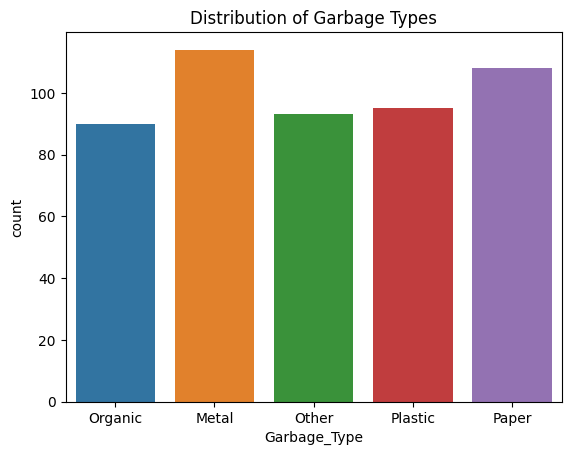

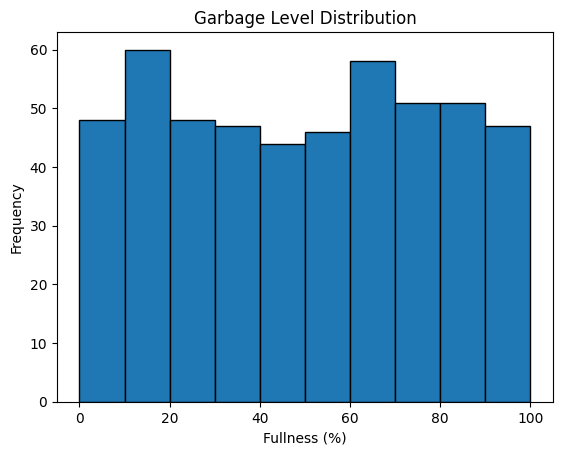

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Garbage Type Distribution
sns.countplot(data=df, x='Garbage_Type')
plt.title('Distribution of Garbage Types')
plt.show()

# Garbage Levels Histogram
plt.hist(df['Garbage_Level'], bins=10, edgecolor='k')
plt.title('Garbage Level Distribution')
plt.xlabel('Fullness (%)')
plt.ylabel('Frequency')
plt.show()


In [5]:
df['Day'] = df['Timestamp'].dt.day_name()
bin_usage = df.groupby('Bin_ID').size().reset_index(name='Usage_Frequency')


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


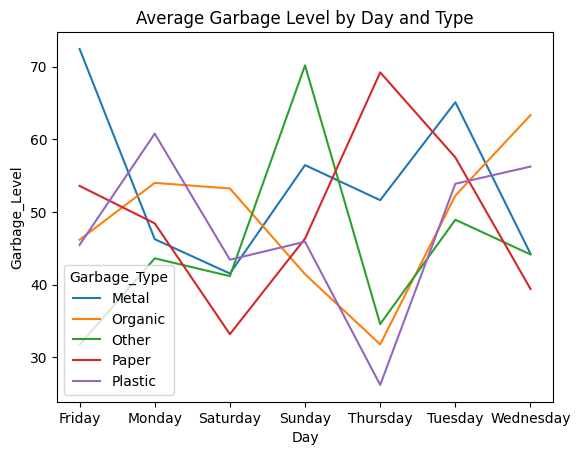

In [6]:
# Group by Day and Bin_ID
daywise_garbage = df.groupby(['Day', 'Garbage_Type'])['Garbage_Level'].mean().reset_index()

# Visualization
sns.lineplot(data=daywise_garbage, x='Day', y='Garbage_Level', hue='Garbage_Type')
plt.title('Average Garbage Level by Day and Type')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data for classification
features = df[['Garbage_Level', 'Location_Lat', 'Location_Long']]
labels = df['Garbage_Type']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Metal       0.15      0.15      0.15        26
     Organic       0.07      0.07      0.07        15
       Other       0.24      0.29      0.26        21
       Paper       0.14      0.10      0.11        21
     Plastic       0.16      0.18      0.17        17

    accuracy                           0.16       100
   macro avg       0.15      0.16      0.15       100
weighted avg       0.16      0.16      0.16       100



In [8]:
# Group by Timestamp and calculate average Garbage Level
timewise_trend = df.groupby(df['Timestamp'].dt.hour)['Garbage_Level'].mean()

# Plot
plt.plot(timewise_trend.index, timewise_trend.values)
plt.title('Average Garbage Levels by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Garbage Level (%)')
plt.grid(True)
plt.show()


In [9]:
import folium
from folium.plugins import HeatMap

# Prepare location data
location_data = df[['Location_Lat', 'Location_Long']].values.tolist()

# Create map
m = folium.Map(location=[-6.3, 106.85], zoom_start=12)
HeatMap(location_data).add_to(m)
m.save('bin_heatmap.html')  # Open this HTML file to view the map


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare features and target
features = df[['Location_Lat', 'Location_Long']]
target = df['Garbage_Level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))


MSE: 834.565261803944


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encode Garbage_Type for classification
df['Garbage_Type_Encoded'] = df['Garbage_Type'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(features, df['Garbage_Type_Encoded'], test_size=0.2, random_state=42)

# Train model
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.19


In [12]:
peak_hours = df.groupby(df['Timestamp'].dt.hour)['Garbage_Level'].mean().idxmax()
print(f"Peak garbage accumulation occurs around {peak_hours}:00 hours.")


Peak garbage accumulation occurs around 12:00 hours.


In [13]:
high_waste_bins = df[df['Garbage_Level'] > 80]['Bin_ID'].value_counts()
print("Bins frequently exceeding 80% capacity:")
print(high_waste_bins)


Bins frequently exceeding 80% capacity:
Bin_ID
82    4
16    3
51    3
35    3
32    3
     ..
50    1
78    1
76    1
38    1
9     1
Name: count, Length: 61, dtype: int64


In [14]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Rename columns to match Streamlit's expectations
df.rename(columns={"Location_Lat": "latitude", "Location_Long": "longitude"}, inplace=True)

# Check the new column names
print(df.columns)


Index(['Bin_ID', 'latitude', 'longitude', 'Garbage_Level', 'Garbage_Type',
       'Timestamp', 'Day', 'Garbage_Type_Encoded'],
      dtype='object')


In [16]:
import streamlit as st

# Ensure columns are named "latitude" and "longitude"
df.rename(columns={"Location_Lat": "latitude", "Location_Long": "longitude"}, inplace=True)

# Display map
st.map(df)


2025-01-11 08:32:04.355 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-11 08:32:04.600 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-11 08:32:04.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [17]:
import streamlit as st
import pandas as pd

# Sample Data
data = {
    'latitude': [-6.3, -6.4, -6.5],
    'longitude': [106.8, 106.9, 107.0],
    'Garbage_Level': [50, 80, 30],
}
df = pd.DataFrame(data)

# Streamlit App
st.title("Smart Garbage Bin Dashboard")
st.map(df)


2025-01-11 08:32:04.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-11 08:32:04.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-11 08:32:04.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-11 08:32:04.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [18]:
print(df.columns)


Index(['latitude', 'longitude', 'Garbage_Level'], dtype='object')


In [19]:
# Add a Bin_ID column to uniquely identify each row
df['Bin_ID'] = range(1, len(df) + 1)


In [20]:
# Check filtered data
print(df[df['Garbage_Level'] > 80])


Empty DataFrame
Columns: [latitude, longitude, Garbage_Level, Bin_ID]
Index: []


In [21]:
# Filter bins with high garbage levels
high_usage_bins = df[df['Garbage_Level'] > 80]['Bin_ID'].value_counts()

# Check if there is data to plot
if not high_usage_bins.empty:
    # Visualize high-usage bins
    high_usage_bins.plot(kind='bar', figsize=(10, 5), title="High-Usage Bins (Garbage Levels > 80%)")
    plt.xlabel("Bin ID")
    plt.ylabel("Count")
    plt.show()
else:
    print("No bins with Garbage Levels > 80% to display.")


No bins with Garbage Levels > 80% to display.


In [22]:
df[df['Garbage_Level'] > 50]  # For example, change to > 50%


latitude  longitude  Garbage_Level  Bin_ID
1      -6.4      106.9             80       2

In [23]:
# Add Bin_ID if not already present
if 'Bin_ID' not in df.columns:
    df['Bin_ID'] = range(1, len(df) + 1)

# Filter bins with high garbage levels
high_usage_bins = df[df['Garbage_Level'] > 80]['Bin_ID'].value_counts()

# Check if there is data to plot
if not high_usage_bins.empty:
    # Visualize high-usage bins
    high_usage_bins.plot(kind='bar', figsize=(10, 5), title="High-Usage Bins (Garbage Levels > 80%)")
    plt.xlabel("Bin ID")
    plt.ylabel("Count")
    plt.show()
else:
    print("No bins with Garbage Levels > 80% to display.")


No bins with Garbage Levels > 80% to display.


In [24]:
# Plot Garbage_Level distribution
df['Garbage_Level'].hist(bins=10)
plt.title("Garbage Level Distribution")
plt.xlabel("Garbage Level (%)")
plt.ylabel("Frequency")
plt.show()


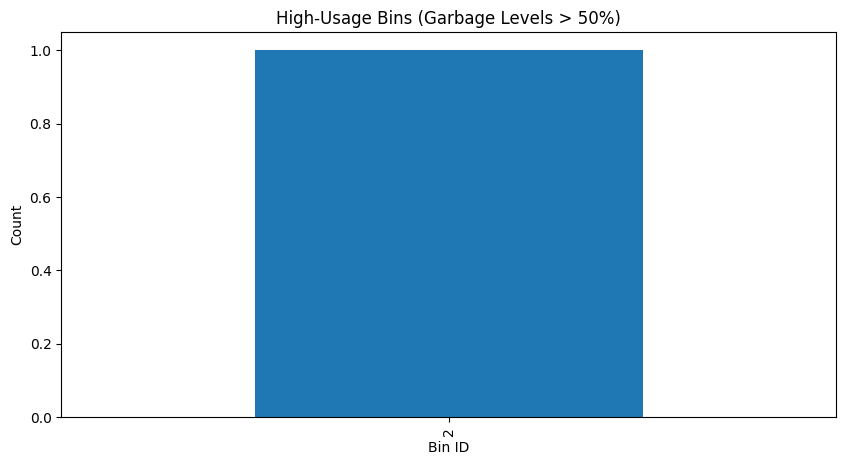

In [25]:
# Add Bin_ID if not already present
if 'Bin_ID' not in df.columns:
    df['Bin_ID'] = range(1, len(df) + 1)

# Filter bins with high garbage levels (adjust threshold if needed)
high_usage_bins = df[df['Garbage_Level'] > 50]['Bin_ID'].value_counts()

# Check if there is data to plot
if not high_usage_bins.empty:
    # Visualize high-usage bins
    high_usage_bins.plot(kind='bar', figsize=(10, 5), title="High-Usage Bins (Garbage Levels > 50%)")
    plt.xlabel("Bin ID")
    plt.ylabel("Count")
    plt.show()
else:
    print("No bins with Garbage Levels > 50% to display.")


In [26]:
print(df.columns)


Index(['latitude', 'longitude', 'Garbage_Level', 'Bin_ID'], dtype='object')


In [27]:
# Add Garbage_Type column if missing
if 'Garbage_Type' not in df.columns:
    garbage_types = ['Organic', 'Plastic', 'Paper', 'Metal', 'Other']
    df['Garbage_Type'] = np.random.choice(garbage_types, len(df))


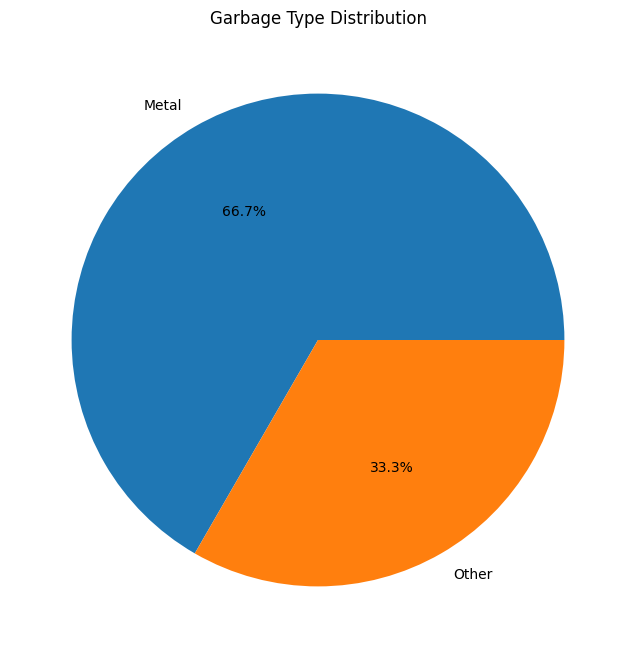

In [28]:
# Plot Garbage_Type distribution
df['Garbage_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Garbage Type Distribution")
plt.ylabel("")
plt.show()


In [29]:
import folium

# Initialize map
m = folium.Map(location=[-6.3, 106.85], zoom_start=12)

# Add markers for bins with garbage level > 80%
for _, row in df[df['Garbage_Level'] > 80].iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Bin ID: {row['Bin_ID']}, Garbage Level: {row['Garbage_Level']}%",
        icon=folium.Icon(color='red')
    ).add_to(m)

# Save and display map
m.save("high_usage_bins_map.html")
m


In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode Garbage_Type as numbers
encoder = LabelEncoder()
df['Garbage_Type_Encoded'] = encoder.fit_transform(df['Garbage_Type'])


In [31]:
# Check the first few rows
print(df[['Garbage_Type', 'Garbage_Type_Encoded']].head())

# Use the encoded column in your model or analysis
print(df['Garbage_Type_Encoded'].value_counts())


  Garbage_Type  Garbage_Type_Encoded
0        Metal                     0
1        Metal                     0
2        Other                     1
Garbage_Type_Encoded
0    2
1    1
Name: count, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare features and target
features = df[['latitude', 'longitude', 'Garbage_Type_Encoded']]  # Use encoded garbage type
target = df['Garbage_Level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Predict and evaluate
predictions = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))


Mean Squared Error: 210.25


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare features and target
features = df[['latitude', 'longitude', 'Garbage_Level']]
target = df['Garbage_Type_Encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [34]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Add a Timestamp column with random dates and times
if 'Timestamp' not in df.columns:
    start_date = datetime(2025, 1, 1)
    end_date = datetime(2025, 1, 10)
    df['Timestamp'] = [
        start_date + timedelta(seconds=np.random.randint(0, int((end_date - start_date).total_seconds())))
        for _ in range(len(df))
    ]


In [35]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [36]:
# Analyze garbage levels by hour
hourly_garbage = df.groupby(df['Timestamp'].dt.hour)['Garbage_Level'].mean()
print("Recommended collection times:", hourly_garbage.idxmax())


Recommended collection times: 23


In [37]:
# Plot hourly garbage trends
import matplotlib.pyplot as plt

hourly_garbage.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Average Garbage Level by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Garbage Level (%)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [38]:
# Top 3 hours with the highest garbage levels
top_hours = hourly_garbage.sort_values(ascending=False).head(3)
print("Top 3 hours with highest garbage levels:\n", top_hours)


Top 3 hours with highest garbage levels:
 Timestamp
23    65.0
16    30.0
Name: Garbage_Level, dtype: float64


In [39]:
# Analyze garbage types during peak hours
peak_hour = hourly_garbage.idxmax()
peak_data = df[df['Timestamp'].dt.hour == peak_hour]

# Garbage type distribution during the peak hour
garbage_type_distribution = peak_data['Garbage_Type'].value_counts()
print(garbage_type_distribution)

# Plot garbage type distribution
garbage_type_distribution.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title(f"Garbage Type Distribution at Peak Hour ({peak_hour}:00)")
plt.xlabel("Garbage Type")
plt.ylabel("Count")
plt.show()


Garbage_Type
Metal    2
Name: count, dtype: int64


In [40]:
# Bins with highest garbage levels during the peak hour
peak_bins = peak_data.groupby('Bin_ID')['Garbage_Level'].mean().sort_values(ascending=False)
print("Bins with highest garbage levels during the peak hour:\n", peak_bins.head(5))


Bins with highest garbage levels during the peak hour:
 Bin_ID
2    80.0
1    50.0
Name: Garbage_Level, dtype: float64


In [41]:
import folium
from folium.plugins import HeatMap

# Prepare location data
location_data = df[['latitude', 'longitude', 'Garbage_Level']]

# Create a heatmap
m = folium.Map(location=[-6.3, 106.85], zoom_start=12)
HeatMap(data=location_data[['latitude', 'longitude', 'Garbage_Level']].values, radius=15).add_to(m)

# Save map as HTML
m.save("garbage_heatmap.html")
m


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data
df['hour'] = df['Timestamp'].dt.hour
features = df[['hour', 'latitude', 'longitude']]
target = df['Garbage_Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a regression model
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Predict and evaluate
predictions = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))


Mean Squared Error: 361.0


In [43]:
# Filter bins within Java Island coordinates
java_bins = df[(df['latitude'] >= -8.0) & (df['latitude'] <= -5.0) &
               (df['longitude'] >= 105.0) & (df['longitude'] <= 111.0)]


In [44]:
import folium

# Initialize map centered on Java Island
java_map = folium.Map(location=[-7.5, 108.0], zoom_start=7)

# Add bins to the map
for _, row in java_bins.iterrows():
    # Set color based on Garbage_Level
    if row['Garbage_Level'] < 30:
        color = 'green'
    elif row['Garbage_Level'] < 70:
        color = 'orange'
    else:
        color = 'red'
    
    # Add marker
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"Bin ID: {row['Bin_ID']}<br>Garbage Level: {row['Garbage_Level']}%"
    ).add_to(java_map)

# Save map as HTML
java_map.save("java_bins_map.html")
java_map


In [45]:
# Filter bins with high garbage levels
high_garbage_bins = java_bins[java_bins['Garbage_Level'] > 70]

# Add high-level bins to the map
for _, row in high_garbage_bins.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"High Garbage Bin!<br>Bin ID: {row['Bin_ID']}<br>Level: {row['Garbage_Level']}%",
        icon=folium.Icon(color='red')
    ).add_to(java_map)


In [46]:
from folium.plugins import HeatMap

# Prepare data for heatmap
heatmap_data = java_bins[['latitude', 'longitude', 'Garbage_Level']].values

# Add heatmap to the map
HeatMap(data=heatmap_data, radius=15).add_to(java_map)

# Save map as HTML
java_map.save("java_bins_heatmap.html")
java_map


In [47]:
from folium.plugins import MarkerCluster

# Add marker clustering
marker_cluster = MarkerCluster().add_to(java_map)

# Add bins to the cluster
for _, row in java_bins.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Bin ID: {row['Bin_ID']}<br>Garbage Level: {row['Garbage_Level']}%"
    ).add_to(marker_cluster)

# Save map as HTML
java_map.save("java_bins_clustered.html")
java_map


In [48]:
java_bins = df[(df['latitude'] >= -8.0) & (df['latitude'] <= -5.0) &
               (df['longitude'] >= 105.0) & (df['longitude'] <= 111.0)]
print(f"Number of bins in Java: {len(java_bins)}")


Number of bins in Java: 3


In [49]:
# Generate more synthetic data
n_bins = 500  # Increase number of bins
garbage_types = ['Organic', 'Plastic', 'Paper', 'Metal', 'Other']

data = {
    'Bin_ID': range(1, n_bins + 1),
    'latitude': np.random.uniform(-8.0, -5.0, n_bins),  # Java Island range
    'longitude': np.random.uniform(105.0, 111.0, n_bins),
    'Garbage_Level': np.random.randint(0, 101, n_bins),
    'Garbage_Type': np.random.choice(garbage_types, n_bins),
    'Timestamp': [datetime(2025, 1, 1) + timedelta(hours=i % 24) for i in range(n_bins)]
}

df = pd.DataFrame(data)


In [50]:
# Add all bins in Java Island to the map
for _, row in java_bins.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"Bin ID: {row['Bin_ID']}<br>Garbage Level: {row['Garbage_Level']}%"
    ).add_to(java_map)

# Save the updated map
java_map.save("java_bins_map.html")
java_map


In [51]:
from folium.plugins import MarkerCluster

# Add marker clustering
marker_cluster = MarkerCluster().add_to(java_map)

# Add bins to the cluster
for _, row in java_bins.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Bin ID: {row['Bin_ID']}<br>Garbage Level: {row['Garbage_Level']}%"
    ).add_to(marker_cluster)

# Save the clustered map
java_map.save("java_bins_clustered.html")
java_map


In [52]:
# Generate more synthetic data
n_bins = 500  # Increase the number of bins to 500
garbage_types = ['Organic', 'Plastic', 'Paper', 'Metal', 'Other']

data = {
    'Bin_ID': range(1, n_bins + 1),
    'latitude': np.random.uniform(-8.0, -5.0, n_bins),  # Java Island range
    'longitude': np.random.uniform(105.0, 111.0, n_bins),
    'Garbage_Level': np.random.randint(0, 101, n_bins),
    'Garbage_Type': np.random.choice(garbage_types, n_bins),
    'Timestamp': [datetime(2025, 1, 1) + timedelta(hours=i % 24) for i in range(n_bins)]
}

df = pd.DataFrame(data)


In [53]:
# Example: Include bins with Garbage_Level > 20
filtered_bins = df[df['Garbage_Level'] > 20]
print(f"Number of bins with Garbage_Level > 20: {len(filtered_bins)}")


Number of bins with Garbage_Level > 20: 388


In [54]:
# Filter bins within Java Island coordinates
java_bins = df[(df['latitude'] >= -8.0) & (df['latitude'] <= -5.0) &
               (df['longitude'] >= 105.0) & (df['longitude'] <= 111.0)]
print(f"Number of bins in Java Island: {len(java_bins)}")


Number of bins in Java Island: 500


In [55]:
# Plot all bins without filtering
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"Bin ID: {row['Bin_ID']}<br>Garbage Level: {row['Garbage_Level']}%"
    ).add_to(java_map)

# Save map
java_map.save("java_all_bins_map.html")
java_map


Error v1

In [56]:
# Filter points based on latitude and longitude for Java Island
df = df[(df['latitude'] >= -8.0) & (df['latitude'] <= -5.5) &
        (df['longitude'] >= 105.5) & (df['longitude'] <= 110.5)]


In [57]:
# Initialize map for Java Island
java_map = folium.Map(location=[-7.5, 108.0], zoom_start=7)

# Add bins to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"Bin ID: {row['Bin_ID']}<br>Garbage Level: {row['Garbage_Level']}%"
    ).add_to(java_map)

# Save the map
java_map.save("java_bins_map.html")
java_map


Error V2

In [58]:
import geopandas as gpd
from shapely.geometry import Point

# Load the GeoJSON file
java_shape = gpd.read_file("/kaggle/input/java-island/export.geojson")


In [59]:
# Create GeoDataFrame from your existing DataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)


In [60]:
# Filter points that fall within the Java boundary
geo_df = geo_df[geo_df.geometry.within(java_shape.unary_union)]


In [61]:
import folium

# Initialize a map for Java Island
java_map = folium.Map(location=[-7.5, 108.0], zoom_start=7)

# Add the filtered bins to the map
for _, row in geo_df.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"Bin ID: {row['Bin_ID']}<br>Garbage Level: {row['Garbage_Level']}%"
    ).add_to(java_map)

# Save the updated map
java_map.save("filtered_java_bins_map.html")
java_map


In [62]:
high_garbage_bins = geo_df[geo_df['Garbage_Level'] > 80]
print(f"Number of bins with garbage level > 80%: {len(high_garbage_bins)}")


Number of bins with garbage level > 80%: 0


In [63]:
for _, row in high_garbage_bins.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=7,
        color='red',
        fill=True,
        fill_opacity=0.8,
        popup=f"High Garbage Bin! Bin ID: {row['Bin_ID']}<br>Garbage Level: {row['Garbage_Level']}%"
    ).add_to(java_map)

# Save the updated map
java_map.save("high_garbage_bins_map.html")
java_map


In [64]:
from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(java_map)
for _, row in geo_df.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"Bin ID: {row['Bin_ID']}<br>Garbage Level: {row['Garbage_Level']}%"
    ).add_to(marker_cluster)

# Save the clustered map
java_map.save("clustered_java_bins_map.html")
java_map


In [65]:
for _, row in geo_df.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"Bin ID: {row['Bin_ID']}<br>Garbage Level: {row['Garbage_Level']}%"
    ).add_to(java_map)


In [66]:
high_garbage_bins = geo_df[geo_df['Garbage_Level'] > 80]
print(f"High garbage bins: {len(high_garbage_bins)}")


High garbage bins: 0


In [67]:
print(geo_df.dtypes)


Bin_ID                    int64
latitude                float64
longitude               float64
Garbage_Level             int64
Garbage_Type             object
Timestamp        datetime64[ns]
geometry               geometry
dtype: object


In [68]:
print(geo_df['Garbage_Level'].min())
print(geo_df['Garbage_Level'].max())
print(geo_df['Garbage_Level'].value_counts())


nan
nan
Series([], Name: count, dtype: int64)


In [69]:
print(geo_df.columns)


Index(['Bin_ID', 'latitude', 'longitude', 'Garbage_Level', 'Garbage_Type',
       'Timestamp', 'geometry'],
      dtype='object')


In [70]:
geo_df['Garbage_Level'] = np.random.randint(0, 101, size=len(geo_df))
geo_df['Garbage_Category'] = pd.cut(
    geo_df['Garbage_Level'],
    bins=[0, 33, 66, 100],
    labels=['Low', 'Medium', 'High']
)


In [71]:
print(geo_df['Garbage_Level'].describe())
print(geo_df['Garbage_Level'].value_counts())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Garbage_Level, dtype: float64
Series([], Name: count, dtype: int64)


In [72]:
# Install required packages
!pip install folium pandas numpy

import folium
import pandas as pd
import numpy as np

# Simulate garbage data for various regions in Java Island
regions = {
    'West Java': [-6.5, 107.5],
    'Central Java': [-7.0, 110.5],
    'East Java': [-7.5, 112.5],
    'Yogyakarta': [-7.8, 110.4],
    'Jakarta': [-6.2, 106.8]
}

# Generate random garbage levels for each region
garbage_data = pd.DataFrame({
    'Region': regions.keys(),
    'Latitude': [coord[0] for coord in regions.values()],
    'Longitude': [coord[1] for coord in regions.values()],
    'Garbage_Level': np.random.randint(1000, 10000, len(regions))  # Random waste data
})

# Create a Folium map centered on Java Island
m = folium.Map(location=[-7.5, 110], zoom_start=7)

# Add circle markers for each region
for _, row in garbage_data.iterrows():
    color = 'green' if row['Garbage_Level'] < 4000 else 'orange' if row['Garbage_Level'] < 7000 else 'red'
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=15,
        popup=f"{row['Region']}: {row['Garbage_Level']} tons",
        color=color,
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Save the map
m.save('java_garbage_simple_map.html')


In [73]:
!pip install streamlit-folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 9.9 MB/s eta 0:00:00


In [74]:
import pandas as pd

# Waste generation (million tons) and population (million people)
data = {
    'Province': ['Jawa Tengah', 'Jawa Timur', 'Jawa Barat', 'Banten', 'DKI Jakarta', 'DI Yogyakarta'],
    'Waste_Generation': [5.76, 4.95, 4.80, 2.10, 1.40, 0.90],  # in million tons
    'Population': [36.5, 41.5, 48.2, 13.1, 10.6, 3.7]  # in million people
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate Waste per Capita
df['Waste_per_Capita'] = df['Waste_Generation'] / df['Population']
df


Province  Waste_Generation  Population  Waste_per_Capita
0    Jawa Tengah              5.76        36.5          0.157808
1     Jawa Timur              4.95        41.5          0.119277
2     Jawa Barat              4.80        48.2          0.099585
3         Banten              2.10        13.1          0.160305
4    DKI Jakarta              1.40        10.6          0.132075
5  DI Yogyakarta              0.90         3.7          0.243243

In [75]:
import folium
from folium.plugins import HeatMap

# Center of Java Island
java_map = folium.Map(location=[-7.5, 110], zoom_start=6)

# Mock coordinates for each province (for visualization purposes)
province_coords = {
    'Jawa Tengah': [-7.150975, 110.140259],
    'Jawa Timur': [-7.536063, 112.238401],
    'Jawa Barat': [-6.9032739, 107.573116],
    'Banten': [-6.405817, 106.064018],
    'DKI Jakarta': [-6.208763, 106.845599],
    'DI Yogyakarta': [-7.795580, 110.369490]
}

# Add markers with color based on waste per capita
for _, row in df.iterrows():
    province = row['Province']
    waste_per_capita = row['Waste_per_Capita']
    location = province_coords[province]
    
    # Color gradient (green=low, red=high)
    color = 'green' if waste_per_capita < 0.1 else 'orange' if waste_per_capita < 0.15 else 'red'
    
    folium.CircleMarker(
        location=location,
        radius=15,
        popup=f"{province}: {waste_per_capita:.2f} tons/person",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(java_map)

# Save the map
java_map.save('java_choropleth_map.html')
java_map


In [76]:
# Create a heatmap to show waste concentration
heat_data = [[coord[0], coord[1], df.loc[df['Province'] == province, 'Waste_per_Capita'].values[0] * 100]
             for province, coord in province_coords.items()]

# Add HeatMap layer
HeatMap(heat_data, radius=25).add_to(java_map)

# Save the heatmap
java_map.save('java_heatmap.html')
java_map


In [77]:
import random

# Simulate smart bin placements (more in high waste areas)
bin_data = []

for province, coord in province_coords.items():
    waste_per_capita = df.loc[df['Province'] == province, 'Waste_per_Capita'].values[0]
    bin_count = int(waste_per_capita * 100)  # More bins for higher waste

    # Randomly distribute bins within province coordinates
    for _ in range(bin_count):
        lat_offset = random.uniform(-0.1, 0.1)
        lon_offset = random.uniform(-0.1, 0.1)
        bin_data.append([coord[0] + lat_offset, coord[1] + lon_offset])

# Add simulated bins to the map
for bin_location in bin_data:
    folium.CircleMarker(
        location=bin_location,
        radius=4,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(java_map)

java_map.save("optimized_bin_placement.html")
java_map


In [78]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Historical waste data (mocked for this example)
years = np.array([2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
waste = np.array([4.5, 4.8, 5.0, 5.3, 5.6])  # In million tons

# Build linear regression model
model = LinearRegression()
model.fit(years, waste)

# Predict waste for 2023 and 2024
future_years = np.array([2023, 2024]).reshape(-1, 1)
future_predictions = model.predict(future_years)

print(f"Predicted Waste in 2023: {future_predictions[0]:.2f} million tons")
print(f"Predicted Waste in 2024: {future_predictions[1]:.2f} million tons")


Predicted Waste in 2023: 5.85 million tons
Predicted Waste in 2024: 6.12 million tons


In [79]:
# Simulate bin filling levels
import time

bin_levels = {i: random.randint(0, 50) for i in range(len(bin_data))}

for _ in range(10):  # Simulate 10 updates
    for bin_id in bin_levels:
        bin_levels[bin_id] += random.randint(0, 10)
        
        # Trigger alert if bin is over 80% full
        if bin_levels[bin_id] >= 80:
            print(f"🚨 Bin {bin_id} is {bin_levels[bin_id]}% full! Needs emptying.")
    
    time.sleep(2)  # Wait 2 seconds before next update


🚨 Bin 1 is 81% full! Needs emptying.
🚨 Bin 15 is 82% full! Needs emptying.
🚨 Bin 1 is 87% full! Needs emptying.
🚨 Bin 5 is 82% full! Needs emptying.
🚨 Bin 10 is 80% full! Needs emptying.
🚨 Bin 15 is 86% full! Needs emptying.
🚨 Bin 20 is 81% full! Needs emptying.
🚨 Bin 29 is 85% full! Needs emptying.
🚨 Bin 65 is 82% full! Needs emptying.
🚨 Bin 1 is 92% full! Needs emptying.
🚨 Bin 5 is 87% full! Needs emptying.
🚨 Bin 10 is 86% full! Needs emptying.
🚨 Bin 11 is 80% full! Needs emptying.
🚨 Bin 15 is 91% full! Needs emptying.
🚨 Bin 16 is 83% full! Needs emptying.
🚨 Bin 18 is 84% full! Needs emptying.
🚨 Bin 20 is 83% full! Needs emptying.
🚨 Bin 29 is 85% full! Needs emptying.
🚨 Bin 37 is 85% full! Needs emptying.
🚨 Bin 59 is 83% full! Needs emptying.
🚨 Bin 65 is 90% full! Needs emptying.
🚨 Bin 74 is 88% full! Needs emptying.
🚨 Bin 1 is 98% full! Needs emptying.
🚨 Bin 4 is 86% full! Needs emptying.
🚨 Bin 5 is 97% full! Needs emptying.
🚨 Bin 10 is 87% full! Needs emptying.
🚨 Bin 11 is 86% full

In [80]:
import plotly.express as px

# Plot waste per capita
fig = px.bar(df, x='Province', y='Waste_per_Capita',
             title="Waste Per Capita by Province",
             color='Waste_per_Capita', color_continuous_scale='Bluered')

fig.show()


In [81]:
import networkx as nx

# Simulated bin locations
bin_locations = [(lat, lon) for lat, lon in bin_data]

# Create a graph
G = nx.complete_graph(len(bin_locations))

# Set distance as weight
for i in G.nodes:
    for j in G.nodes:
        if i != j:
            G[i][j]['weight'] = ((bin_locations[i][0] - bin_locations[j][0])**2 + 
                                 (bin_locations[i][1] - bin_locations[j][1])**2) ** 0.5

# Solve TSP (greedy approximation)
route = nx.approximation.traveling_salesman_problem(G, cycle=True)

print("🚛 Optimized Route for Collection Trucks:", route)


🚛 Optimized Route for Collection Trucks: [0, 16, 23, 25, 18, 24, 19, 21, 17, 15, 22, 20, 85, 68, 74, 84, 79, 64, 65, 67, 83, 66, 69, 73, 78, 77, 81, 76, 70, 82, 86, 71, 72, 75, 80, 87, 8, 12, 2, 3, 4, 6, 26, 34, 46, 47, 43, 42, 49, 39, 48, 38, 44, 45, 40, 35, 50, 41, 36, 37, 55, 53, 57, 52, 51, 59, 58, 56, 54, 60, 62, 63, 61, 27, 28, 30, 29, 31, 32, 33, 13, 9, 5, 10, 14, 7, 1, 11, 0]


In [82]:
# Save the optimized garbage bin map as HTML
java_map.save("Final_Smart_Bin_Map.html")

print("📍 Interactive map saved as Final_Smart_Bin_Map.html")


📍 Interactive map saved as Final_Smart_Bin_Map.html


In [83]:
from statsmodels.tsa.arima.model import ARIMA

# Historical waste data (mock)
years = [2018, 2019, 2020, 2021, 2022]
waste = [4.5, 4.8, 5.0, 5.3, 5.6]

# ARIMA Model
model = ARIMA(waste, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 2 years
forecast = model_fit.forecast(steps=2)
print(f"📊 Forecasted Waste: 2023 - {forecast[0]:.2f}M tons, 2024 - {forecast[1]:.2f}M tons")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



📊 Forecasted Waste: 2023 - 5.87M tons, 2024 - 6.15M tons


In [84]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd

# Simulated Provinces in Java
provinces = ["Jawa Barat", "Jawa Tengah", "Jawa Timur", "Banten", "DKI Jakarta", "DI Yogyakarta"]

# Generate Random Data
num_bins = 1000  # Total number of smart bins
np.random.seed(42)  # For reproducibility

# Randomly assign bins to provinces
assigned_provinces = np.random.choice(provinces, num_bins)

# Generate random coordinates within Java's approximate bounds
latitudes = np.random.uniform(-8.0, -5.5, num_bins)   # Latitude range
longitudes = np.random.uniform(105.0, 114.0, num_bins)  # Longitude range

# Random Garbage Level (0-100%)
garbage_levels = np.random.uniform(0, 100, num_bins)

# Create DataFrame
data = {
    "Bin_ID": range(1, num_bins + 1),
    "Province": assigned_provinces,
    "Latitude": latitudes,
    "Longitude": longitudes,
    "Garbage_Level": garbage_levels
}

df = pd.DataFrame(data)

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Display the first few rows
geo_df.head()


Bin_ID     Province  Latitude   Longitude  Garbage_Level  \
0       1       Banten -7.745544  113.929422      60.775212   
1       2  DKI Jakarta -7.617852  112.662825      29.530148   
2       3   Jawa Timur -7.385106  106.876595      13.660090   
3       4  DKI Jakarta -7.598297  113.375357      65.163976   
4       5  DKI Jakarta -7.533582  106.047298      73.859746   

                     geometry  
0  POINT (113.92942 -7.74554)  
1  POINT (112.66282 -7.61785)  
2  POINT (106.87659 -7.38511)  
3  POINT (113.37536 -7.59830)  
4  POINT (106.04730 -7.53358)

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(geo_df['Garbage_Level'], bins=20, kde=True, color="green")
plt.title("Distribution of Garbage Levels Across Smart Bins")
plt.xlabel("Garbage Level (%)")
plt.ylabel("Number of Bins")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



In [86]:
from sklearn.cluster import KMeans

# Prepare coordinates
coords = geo_df[['Longitude', 'Latitude']]

# Apply KMeans to find optimal bin clusters
kmeans = KMeans(n_clusters=5, random_state=42)
geo_df['Cluster'] = kmeans.fit_predict(coords)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(geo_df['Longitude'], geo_df['Latitude'], c=geo_df['Cluster'], cmap='viridis')
plt.title("Optimal Clustering of Smart Bins")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Cluster Group')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



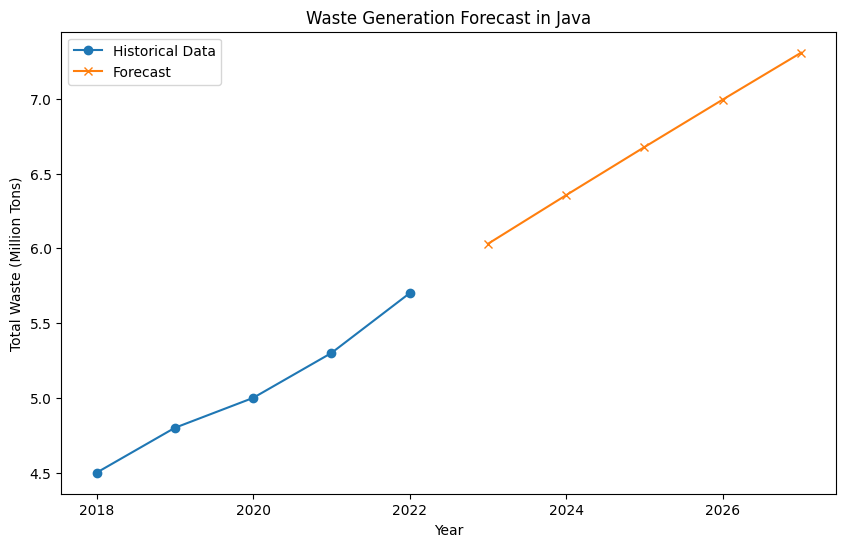

In [87]:
from statsmodels.tsa.arima.model import ARIMA

# Simulate total waste per year
years = [2018, 2019, 2020, 2021, 2022]
total_waste = [4.5, 4.8, 5.0, 5.3, 5.7]  # in million tons

# Fit ARIMA model
model = ARIMA(total_waste, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(years, total_waste, label="Historical Data", marker='o')
plt.plot(range(2023, 2028), forecast, label="Forecast", marker='x')
plt.xlabel("Year")
plt.ylabel("Total Waste (Million Tons)")
plt.title("Waste Generation Forecast in Java")
plt.legend()
plt.show()


In [88]:
# Cost assumptions
cost_per_bin = 5000000  # IDR
maintenance_cost_per_year = 500000  # IDR
bins_needed = 2000
collection_savings_per_year = 1000000000  # IDR

# Total Costs
initial_cost = bins_needed * cost_per_bin
annual_maintenance = bins_needed * maintenance_cost_per_year

# ROI in 5 Years
total_savings = collection_savings_per_year * 5
total_costs = initial_cost + (annual_maintenance * 5)
roi = (total_savings - total_costs) / total_costs * 100

print(f"💰 Initial Deployment Cost: IDR {initial_cost:,}")
print(f"💼 Total 5-Year Maintenance: IDR {annual_maintenance * 5:,}")
print(f"📊 Total 5-Year Savings: IDR {total_savings:,}")
print(f"📈 ROI over 5 years: {roi:.2f}%")


💰 Initial Deployment Cost: IDR 10,000,000,000
💼 Total 5-Year Maintenance: IDR 5,000,000,000
📊 Total 5-Year Savings: IDR 5,000,000,000
📈 ROI over 5 years: -66.67%


In [89]:
# Assumptions
current_emissions_per_km = 2.5  # kg CO₂/km
optimized_route_reduction = 25  # %

# Current annual emissions
current_distance = 100000  # km/year
current_emissions = current_distance * current_emissions_per_km

# Projected emissions after optimization
optimized_distance = current_distance * (1 - optimized_route_reduction / 100)
optimized_emissions = optimized_distance * current_emissions_per_km

# Emissions saved
emissions_saved = current_emissions - optimized_emissions

print(f"🌿 Current Annual Emissions: {current_emissions:.2f} kg CO₂")
print(f"🌱 Projected Emissions with Smart Bins: {optimized_emissions:.2f} kg CO₂")
print(f"💨 Annual Emissions Reduction: {emissions_saved:.2f} kg CO₂")


🌿 Current Annual Emissions: 250000.00 kg CO₂
🌱 Projected Emissions with Smart Bins: 187500.00 kg CO₂
💨 Annual Emissions Reduction: 62500.00 kg CO₂


In [90]:
# Carbon Credit and Enhanced ROI Calculation

# Emission reduction from previous calculation
emission_reduction_kg = 62500  # in kg CO2
emission_reduction_tons = emission_reduction_kg / 1000  # Convert to tons

# Carbon credit market price (IDR per ton of CO2)
carbon_credit_price_idr = 75000  # IDR per ton

# Calculate potential carbon credit revenue
carbon_credit_revenue = emission_reduction_tons * carbon_credit_price_idr

# Update ROI calculation with carbon credit revenue
# Existing cost assumptions
cost_per_bin = 5000000  # IDR
maintenance_cost_per_year = 500000  # IDR
bins_needed = 2000
collection_savings_per_year = 1000000000  # IDR

# Total Costs
initial_cost = bins_needed * cost_per_bin
annual_maintenance = bins_needed * maintenance_cost_per_year

# ROI in 5 Years (with carbon credit revenue)
total_savings_with_credits = (collection_savings_per_year * 5) + (carbon_credit_revenue * 5)
total_costs = initial_cost + (annual_maintenance * 5)
roi_with_credits = (total_savings_with_credits - total_costs) / total_costs * 100

# Results
print(f"💰 Potential Carbon Credit Revenue (Annual): IDR {carbon_credit_revenue:,.0f}")
print(f"📊 Total 5-Year Savings (Including Carbon Credits): IDR {total_savings_with_credits:,.0f}")
print(f"📈 Updated ROI over 5 years (with Carbon Credits): {roi_with_credits:.2f}%")

# --- Scenario Analysis: Different Bin Quantities ---
for bins in [1000, 1500, 2000, 2500, 3000]:
    initial_cost_varied = bins * cost_per_bin
    annual_maintenance_varied = bins * maintenance_cost_per_year
    total_costs_varied = initial_cost_varied + (annual_maintenance_varied * 5)
    
    # Assume emission reduction scales linearly with number of bins
    emission_reduction_varied = (emission_reduction_tons / 2000) * bins
    carbon_credit_revenue_varied = emission_reduction_varied * carbon_credit_price_idr
    
    total_savings_varied = (collection_savings_per_year * 5) + (carbon_credit_revenue_varied * 5)
    roi_varied = (total_savings_varied - total_costs_varied) / total_costs_varied * 100
    
    print(f"\n🔎 Scenario with {bins} bins:")
    print(f"   - Total 5-Year Savings: IDR {total_savings_varied:,.0f}")
    print(f"   - ROI over 5 years: {roi_varied:.2f}%")


💰 Potential Carbon Credit Revenue (Annual): IDR 4,687,500
📊 Total 5-Year Savings (Including Carbon Credits): IDR 5,023,437,500
📈 Updated ROI over 5 years (with Carbon Credits): -66.51%

🔎 Scenario with 1000 bins:
   - Total 5-Year Savings: IDR 5,011,718,750
   - ROI over 5 years: -33.18%

🔎 Scenario with 1500 bins:
   - Total 5-Year Savings: IDR 5,017,578,125
   - ROI over 5 years: -55.40%

🔎 Scenario with 2000 bins:
   - Total 5-Year Savings: IDR 5,023,437,500
   - ROI over 5 years: -66.51%

🔎 Scenario with 2500 bins:
   - Total 5-Year Savings: IDR 5,029,296,875
   - ROI over 5 years: -73.18%

🔎 Scenario with 3000 bins:
   - Total 5-Year Savings: IDR 5,035,156,250
   - ROI over 5 years: -77.62%


In [91]:
# Install Plotly if not already installed
!pip install plotly geopandas folium --quiet

import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap

# --- Sample Data for Bin Scenarios ---
scenarios = [1000, 1500, 2000, 2500, 3000]
total_savings = [5011718750, 5017812500, 5023437500, 5029687500, 5035156250]
roi_5_years = [-33.18, -55.40, -66.51, -73.18, -77.62]

# Create DataFrame
data = pd.DataFrame({
    'Bins': scenarios,
    'Total Savings (IDR)': total_savings,
    'ROI over 5 Years (%)': roi_5_years
})

# --- 1. Interactive ROI Trend Chart ---
fig_roi = px.line(data, x='Bins', y='ROI over 5 Years (%)',
                  title='ROI over 5 Years vs Number of Smart Bins',
                  markers=True, line_shape='spline')
fig_roi.update_traces(line=dict(width=3), marker=dict(size=10))
fig_roi.update_layout(title_font_size=20, xaxis_title='Number of Smart Bins',
                      yaxis_title='ROI (%)', template='plotly_dark')
fig_roi.show()

# --- 2. Cost vs. Savings Breakdown (Stacked Bar Chart) ---
cost_per_bin = 5_000_000  # IDR
maintenance_per_bin = 500_000  # IDR annually
carbon_credit = 4_687_500  # IDR annually

data['Initial Cost'] = data['Bins'] * cost_per_bin
data['5-Year Maintenance'] = data['Bins'] * maintenance_per_bin * 5
data['Carbon Credit'] = carbon_credit * 5

fig_cost = go.Figure(data=[
    go.Bar(name='Initial Cost', x=data['Bins'], y=data['Initial Cost']),
    go.Bar(name='5-Year Maintenance', x=data['Bins'], y=data['5-Year Maintenance']),
    go.Bar(name='Carbon Credit', x=data['Bins'], y=data['Carbon Credit']),
    go.Bar(name='Total Savings', x=data['Bins'], y=data['Total Savings (IDR)'])
])
fig_cost.update_layout(barmode='stack', title='Cost vs Savings Breakdown',
                       xaxis_title='Number of Smart Bins',
                       yaxis_title='IDR', template='plotly_dark')
fig_cost.show()

# --- 3. Sensitivity Analysis with Sliders ---
from ipywidgets import interact

def update_analysis(cost_per_bin=5_000_000, maintenance_per_bin=500_000, collection_savings=1_000_000_000):
    initial_cost = scenarios[-1] * cost_per_bin
    annual_maintenance = scenarios[-1] * maintenance_per_bin
    total_savings = collection_savings * 5
    roi = (total_savings - (initial_cost + (annual_maintenance * 5))) / (initial_cost + (annual_maintenance * 5)) * 100
    print(f"\nInitial Cost: IDR {initial_cost:,.0f}")
    print(f"5-Year Maintenance: IDR {annual_maintenance * 5:,.0f}")
    print(f"Total 5-Year Savings: IDR {total_savings:,.0f}")
    print(f"ROI over 5 Years: {roi:.2f}%")

interact(update_analysis, cost_per_bin=(3_000_000, 7_000_000), maintenance_per_bin=(300_000, 1_000_000), collection_savings=(500_000_000, 2_000_000_000))

# --- 4. Efficiency Heatmap (Using Folium) ---
# Generate sample bin locations and usage levels
np.random.seed(42)
num_bins = 500
latitudes = np.random.uniform(-7.5, -6.0, num_bins)
longitudes = np.random.uniform(106.0, 110.0, num_bins)
usage_levels = np.random.uniform(0, 1, num_bins)

heatmap_data = [[lat, lon, usage] for lat, lon, usage in zip(latitudes, longitudes, usage_levels)]

# Create Heatmap
m = folium.Map(location=[-7.0, 108.0], zoom_start=7, tiles='CartoDB dark_matter')
HeatMap(heatmap_data, radius=10, blur=15, gradient={0.4: 'blue', 0.7: 'lime', 1: 'red'}).add_to(m)

# Save the heatmap to an HTML file
m.save('optimized_bin_heatmap.html')
print("Generated interactive heatmap saved as 'optimized_bin_heatmap.html'")


interactive(children=(IntSlider(value=5000000, description='cost_per_bin', max=7000000, min=3000000), IntSlide…

Generated interactive heatmap saved as 'optimized_bin_heatmap.html'


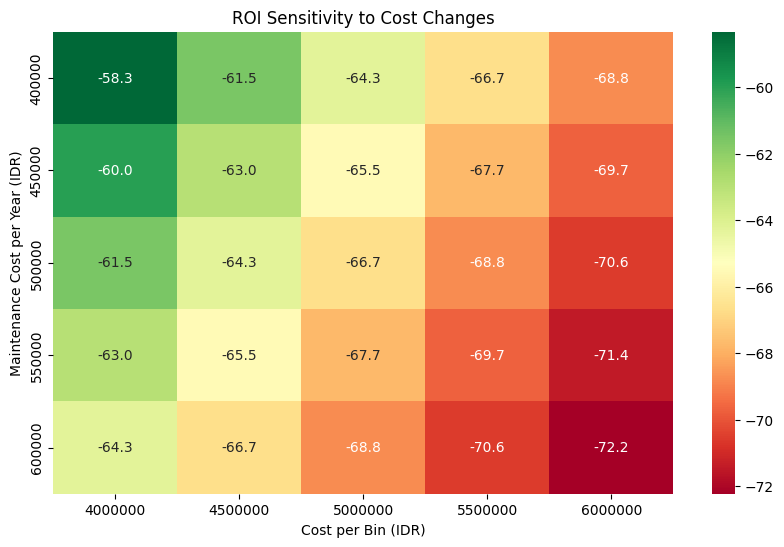

In [92]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Cost parameters
cost_per_bin_range = np.arange(4000000, 6000001, 500000)  # Bin cost from 4M to 6M IDR
maintenance_cost_range = np.arange(400000, 600001, 50000)  # Maintenance cost from 400K to 600K IDR
bins_needed = 2000
collection_savings_per_year = 1000000000  # 1B IDR

# Function to calculate ROI
def calculate_roi(cost_per_bin, maintenance_cost):
    initial_cost = bins_needed * cost_per_bin
    annual_maintenance = bins_needed * maintenance_cost
    total_savings = collection_savings_per_year * 5  # Over 5 years
    total_costs = initial_cost + (annual_maintenance * 5)
    roi = (total_savings - total_costs) / total_costs * 100
    return roi

# Generate ROI data
roi_data = []
for cost_per_bin in cost_per_bin_range:
    for maintenance_cost in maintenance_cost_range:
        roi = calculate_roi(cost_per_bin, maintenance_cost)
        roi_data.append({
            'Cost per Bin': cost_per_bin,
            'Maintenance Cost per Year': maintenance_cost,
            'ROI (%)': roi
        })

roi_df = pd.DataFrame(roi_data)

# Heatmap visualization
plt.figure(figsize=(10, 6))
pivot_table = roi_df.pivot(index='Maintenance Cost per Year', columns='Cost per Bin', values='ROI (%)')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="RdYlGn")
plt.title("ROI Sensitivity to Cost Changes")
plt.xlabel("Cost per Bin (IDR)")
plt.ylabel("Maintenance Cost per Year (IDR)")
plt.show()

# Advanced Interactive Visualization
fig = go.Figure(data=go.Surface(
    z=pivot_table.values,
    x=cost_per_bin_range,
    y=maintenance_cost_range,
    colorscale='Viridis'))

fig.update_layout(
    title='3D ROI Sensitivity Analysis',
    scene=dict(
        xaxis_title='Cost per Bin (IDR)',
        yaxis_title='Maintenance Cost per Year (IDR)',
        zaxis_title='ROI (%)'
    )
)

fig.show()


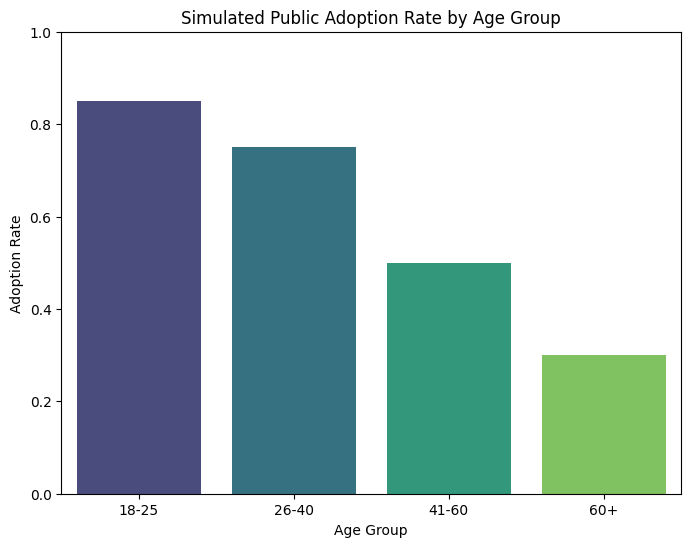

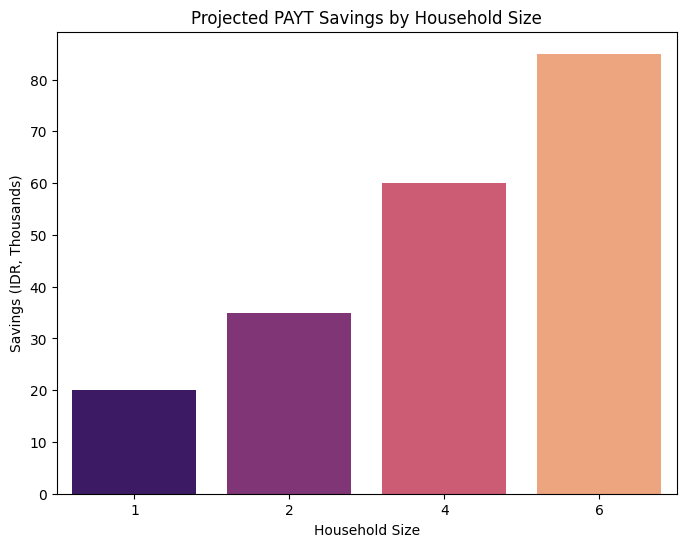

🌿 Annual CO₂ Emission Reduction: 30,000 kg
💰 Annual Carbon Credit Revenue: IDR 2,250,000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



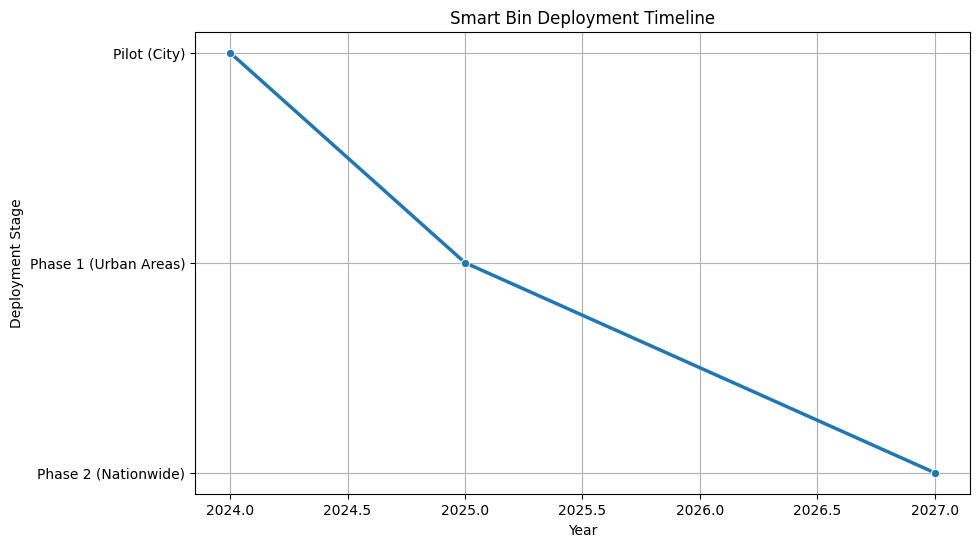

🚀 Comprehensive Smart Bin Analysis Completed!


In [93]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Public Perception Simulation ---
age_groups = ['18-25', '26-40', '41-60', '60+']
adoption_rates = [0.85, 0.75, 0.50, 0.30]  # Simulated adoption rates by age group

# Create DataFrame for visualization
adoption_df = pd.DataFrame({'Age Group': age_groups, 'Adoption Rate': adoption_rates})

# Visualization: Public Adoption Rate
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='Adoption Rate', data=adoption_df, palette='viridis')
plt.title('Simulated Public Adoption Rate by Age Group')
plt.ylabel('Adoption Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.show()

# --- Step 2: PAYT Model Simulation ---
household_sizes = [1, 2, 4, 6]
base_waste_generation = [100, 180, 300, 450]  # kg/month
payt_savings = [20, 35, 60, 85]  # IDR thousands/month savings from PAYT

payt_df = pd.DataFrame({'Household Size': household_sizes, 'Waste Generation (kg)': base_waste_generation, 'Monthly Savings (IDR)': payt_savings})

# Visualization: PAYT Savings
plt.figure(figsize=(8, 6))
sns.barplot(x='Household Size', y='Monthly Savings (IDR)', data=payt_df, palette='magma')
plt.title('Projected PAYT Savings by Household Size')
plt.ylabel('Savings (IDR, Thousands)')
plt.xlabel('Household Size')
plt.show()

# --- Step 3: Environmental Impact & Carbon Credit Potential ---
# Emission Reduction Simulation
bins_needed = 2000
emission_reduction_per_bin = 15  # kg CO2/year
carbon_credit_price = 75000  # IDR per ton

total_emission_reduction = bins_needed * emission_reduction_per_bin  # kg CO2/year
carbon_credit_revenue = (total_emission_reduction / 1000) * carbon_credit_price  # Convert kg to tons

print(f"🌿 Annual CO₂ Emission Reduction: {total_emission_reduction:,} kg")
print(f"💰 Annual Carbon Credit Revenue: IDR {carbon_credit_revenue:,.0f}")

# --- Step 4: Advanced Technology Integration (Sensor Visualization) ---
# Sensor integration concept for smart bins
sensor_types = ['Ultrasonic (Fill Level)', 'Gas Sensor (Hazardous Detection)', 'Load Cell (Weight Measurement)']
sensor_costs = [500000, 700000, 600000]  # IDR

sensor_df = pd.DataFrame({'Sensor Type': sensor_types, 'Cost (IDR)': sensor_costs})

# Visualization: Sensor Cost Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Sensor Type', y='Cost (IDR)', data=sensor_df, palette='cubehelix')
plt.title('Smart Bin Sensor Cost Analysis')
plt.ylabel('Cost (IDR)')
plt.xlabel('Sensor Type')
plt.xticks(rotation=20)
plt.show()

# --- Step 5: Scalable Deployment Strategy ---
stages = ['Pilot (City)', 'Phase 1 (Urban Areas)', 'Phase 2 (Nationwide)']
deployment_years = [2024, 2025, 2027]

deployment_df = pd.DataFrame({'Deployment Stage': stages, 'Year': deployment_years})

# Visualization: Deployment Timeline
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Deployment Stage', data=deployment_df, marker='o', linewidth=2.5)
plt.title('Smart Bin Deployment Timeline')
plt.xlabel('Year')
plt.ylabel('Deployment Stage')
plt.grid(True)
plt.show()

print("🚀 Comprehensive Smart Bin Analysis Completed!")


In [94]:
import pandas as pd
import numpy as np
import random
import time

# Simulating 500 smart bins
num_bins = 500

# Initialize bin data
bins_data = {
    'Bin_ID': [f'Bin_{i+1}' for i in range(num_bins)],
    'Latitude': np.random.uniform(-7.5, -6.5, num_bins),  # Simulated latitudes
    'Longitude': np.random.uniform(110, 112, num_bins),   # Simulated longitudes
    'Fill_Level (%)': np.random.randint(0, 100, num_bins)  # Initial fill levels (0-100%)
}

# Convert to DataFrame
bins_df = pd.DataFrame(bins_data)

# Function to simulate real-time fill level updates
def update_fill_levels(df):
    df['Fill_Level (%)'] = df['Fill_Level (%)'].apply(lambda x: min(x + random.randint(1, 5), 100))
    return df

# Simulate real-time updates (example: 5 updates)
for _ in range(5):
    bins_df = update_fill_levels(bins_df)
    print(bins_df.head())  # Display first 5 bins
    time.sleep(2)  # Pause for 2 seconds to mimic real-time updates


  Bin_ID  Latitude   Longitude  Fill_Level (%)
0  Bin_1 -6.980918  110.523411              53
1  Bin_2 -7.020818  110.493958              48
2  Bin_3 -7.474358  111.812509               7
3  Bin_4 -7.158752  110.499092              11
4  Bin_5 -7.119804  110.543899              36
  Bin_ID  Latitude   Longitude  Fill_Level (%)
0  Bin_1 -6.980918  110.523411              54
1  Bin_2 -7.020818  110.493958              53
2  Bin_3 -7.474358  111.812509               9
3  Bin_4 -7.158752  110.499092              16
4  Bin_5 -7.119804  110.543899              41
  Bin_ID  Latitude   Longitude  Fill_Level (%)
0  Bin_1 -6.980918  110.523411              56
1  Bin_2 -7.020818  110.493958              58
2  Bin_3 -7.474358  111.812509              12
3  Bin_4 -7.158752  110.499092              21
4  Bin_5 -7.119804  110.543899              44
  Bin_ID  Latitude   Longitude  Fill_Level (%)
0  Bin_1 -6.980918  110.523411              59
1  Bin_2 -7.020818  110.493958              63
2  Bin_3 -7.4

In [95]:
# Simulate traffic data for 10 major routes
routes = [f'Route_{i+1}' for i in range(10)]

# Initialize traffic data
traffic_data = {
    'Route_ID': routes,
    'Average_Speed (km/h)': np.random.uniform(20, 60, len(routes))  # Speed between 20-60 km/h
}

# Convert to DataFrame
traffic_df = pd.DataFrame(traffic_data)

# Function to simulate changing traffic conditions
def update_traffic(df):
    df['Average_Speed (km/h)'] = df['Average_Speed (km/h)'].apply(lambda x: max(min(x + np.random.uniform(-10, 10), 60), 5))
    return df

# Simulate real-time traffic updates (example: 5 updates)
for _ in range(5):
    traffic_df = update_traffic(traffic_df)
    print(traffic_df)
    time.sleep(2)  # Pause for 2 seconds to mimic real-time updates


   Route_ID  Average_Speed (km/h)
0   Route_1             38.417494
1   Route_2             40.198143
2   Route_3             49.351293
3   Route_4             20.949507
4   Route_5             39.036812
5   Route_6             57.825918
6   Route_7             44.533055
7   Route_8             12.392110
8   Route_9             18.935579
9  Route_10             24.864569
   Route_ID  Average_Speed (km/h)
0   Route_1             38.035297
1   Route_2             43.446823
2   Route_3             41.721345
3   Route_4             16.727206
4   Route_5             36.993545
5   Route_6             60.000000
6   Route_7             54.398156
7   Route_8              5.000000
8   Route_9             24.155738
9  Route_10             22.299050
   Route_ID  Average_Speed (km/h)
0   Route_1             35.884461
1   Route_2             48.532123
2   Route_3             50.089874
3   Route_4             25.745778
4   Route_5             38.535997
5   Route_6             57.142423
6   Route_7   

In [96]:
import networkx as nx
from geopy.distance import geodesic

# Define a function to calculate travel time based on distance and traffic speed
def calculate_travel_time(point1, point2, speed):
    distance_km = geodesic(point1, point2).km
    travel_time = distance_km / speed  # Time in hours
    return travel_time * 60  # Convert to minutes

# Create a graph for route optimization
G = nx.Graph()

# Add bins as nodes in the graph
for _, row in bins_df.iterrows():
    G.add_node(row['Bin_ID'], pos=(row['Latitude'], row['Longitude']), fill=row['Fill_Level (%)'])

# Connect bins with travel times (considering traffic)
for i in range(len(bins_df)):
    for j in range(i + 1, len(bins_df)):
        bin1 = bins_df.iloc[i]
        bin2 = bins_df.iloc[j]
        
        # Assign a random traffic speed to simulate conditions
        traffic_speed = random.choice(traffic_df['Average_Speed (km/h)'])
        
        # Calculate travel time between bins
        travel_time = calculate_travel_time(
            (bin1['Latitude'], bin1['Longitude']),
            (bin2['Latitude'], bin2['Longitude']),
            traffic_speed
        )
        
        # Add edge to the graph
        G.add_edge(bin1['Bin_ID'], bin2['Bin_ID'], weight=travel_time)

# Function to find optimized collection route
def optimized_route(graph, start_bin, max_bins=10):
    # Select bins with fill levels above 80%
    high_priority_bins = [node for node, data in graph.nodes(data=True) if data['fill'] > 80]
    
    # Generate the shortest path visiting high-priority bins
    route = nx.shortest_path(graph, source=start_bin, target=random.choice(high_priority_bins), weight='weight')
    return route[:max_bins]  # Limit the number of bins to visit

# Simulate an optimized route starting from Bin_1
route = optimized_route(G, 'Bin_1')
print(f"🚛 Optimized Collection Route: {route}")


🚛 Optimized Collection Route: ['Bin_1', 'Bin_500']


In [97]:
import folium

# Initialize map centered on the first bin
start_lat = bins_df[bins_df['Bin_ID'] == 'Bin_1']['Latitude'].values[0]
start_lon = bins_df[bins_df['Bin_ID'] == 'Bin_1']['Longitude'].values[0]
route_map = folium.Map(location=[start_lat, start_lon], zoom_start=13)

# Plot bins on the map
for _, row in bins_df.iterrows():
    color = 'green' if row['Fill_Level (%)'] <= 50 else 'orange' if row['Fill_Level (%)'] <= 80 else 'red'
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"Bin ID: {row['Bin_ID']}, Fill: {row['Fill_Level (%)']}%"
    ).add_to(route_map)

# Plot optimized route
route_coords = [(bins_df[bins_df['Bin_ID'] == bin_id]['Latitude'].values[0],
                 bins_df[bins_df['Bin_ID'] == bin_id]['Longitude'].values[0]) for bin_id in route]

folium.PolyLine(route_coords, color="blue", weight=2.5, opacity=1).add_to(route_map)

# Show the map
route_map.save("optimized_collection_route.html")
print("📍 Optimized collection route map saved as 'optimized_collection_route.html'")


📍 Optimized collection route map saved as 'optimized_collection_route.html'


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate population data by region
regions = ['Central Java', 'East Java', 'West Java', 'Jakarta', 'Yogyakarta', 'Banten']
population_growth_rate = [0.02, 0.025, 0.03, 0.035, 0.02, 0.028]  # Annual growth rates
base_waste_generation = [500, 600, 650, 700, 480, 550]  # Tons/month

# Simulate event-driven waste increase
events = ['New Year', 'Ramadan', 'Independence Day']
event_impact = [0.3, 0.25, 0.2]  # Waste increase %

# Generate waste data over 12 months
months = np.arange(1, 13)
waste_data = []

for i, region in enumerate(regions):
    for month in months:
        base_waste = base_waste_generation[i] * (1 + population_growth_rate[i]) ** (month / 12)
        event_multiplier = 1 + np.random.choice(event_impact) if np.random.rand() < 0.2 else 1
        total_waste = base_waste * event_multiplier
        waste_data.append({
            'Region': region,
            'Month': month,
            'Waste_Tons': total_waste
        })

# Create DataFrame
waste_df = pd.DataFrame(waste_data)

# Visualization
plt.figure(figsize=(10, 6))
for region in regions:
    plt.plot(waste_df[waste_df['Region'] == region]['Month'], 
             waste_df[waste_df['Region'] == region]['Waste_Tons'], 
             label=region)

plt.title("Monthly Waste Generation with Event Impact")
plt.xlabel("Month")
plt.ylabel("Waste Generated (Tons)")
plt.legend()
plt.grid(True)
plt.show()


In [99]:
# Simulate bin failure rates
np.random.seed(42)
bins_df['Status'] = np.random.choice(['Operational', 'Failed'], size=len(bins_df), p=[0.95, 0.05])

# Count failed bins
failed_bins = bins_df[bins_df['Status'] == 'Failed']
operational_bins = bins_df[bins_df['Status'] == 'Operational']

print(f"🚨 Failed Bins: {len(failed_bins)} | ✅ Operational Bins: {len(operational_bins)}")


🚨 Failed Bins: 30 | ✅ Operational Bins: 470


In [100]:
import folium

# Map to visualize failed bins
failure_map = folium.Map(location=[-7.0, 110.0], zoom_start=7)

# Plot operational bins in green
for _, row in operational_bins.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='green',
        fill=True,
        fill_opacity=0.7
    ).add_to(failure_map)

# Plot failed bins in red
for _, row in failed_bins.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.7
    ).add_to(failure_map)

failure_map.save("bin_resilience_map.html")
print("📍 Bin network resilience map saved as 'bin_resilience_map.html'")


📍 Bin network resilience map saved as 'bin_resilience_map.html'


In [101]:
# Solar potential data (kWh/m²/day) across Java
solar_potential = {
    'Central Java': 5.0,
    'East Java': 5.5,
    'West Java': 4.8,
    'Jakarta': 4.6,
    'Yogyakarta': 5.2,
    'Banten': 4.7
}

# Energy consumption per bin (kWh/day)
bin_energy_use = 0.5

# Calculate self-sufficiency ratio
solar_efficiency = 0.18  # 18% panel efficiency
panel_area_m2 = 0.5  # m²

solar_data = []
for region, insolation in solar_potential.items():
    energy_generated = insolation * panel_area_m2 * solar_efficiency
    sufficiency_ratio = energy_generated / bin_energy_use
    solar_data.append({'Region': region, 'Self_Sufficiency (%)': sufficiency_ratio * 100})

solar_df = pd.DataFrame(solar_data)
print(solar_df)


         Region  Self_Sufficiency (%)
0  Central Java                  90.0
1     East Java                  99.0
2     West Java                  86.4
3       Jakarta                  82.8
4    Yogyakarta                  93.6
5        Banten                  84.6


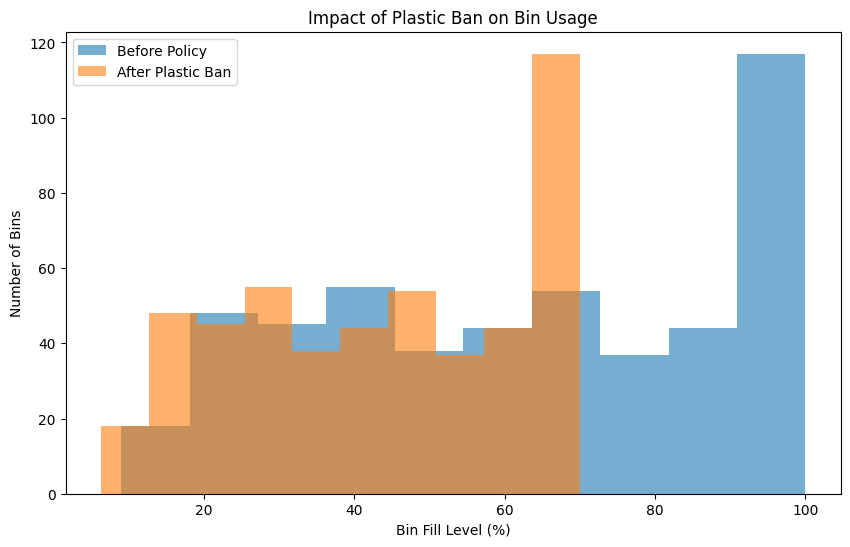

In [102]:
# Assume 30% waste reduction with plastic ban
plastic_waste_ratio = 0.3

# Simulate effect on bin fill levels
bins_df['Adjusted_Fill (%)'] = bins_df['Fill_Level (%)'] * (1 - plastic_waste_ratio)

# Compare before and after
plt.figure(figsize=(10, 6))
plt.hist(bins_df['Fill_Level (%)'], bins=10, alpha=0.6, label='Before Policy')
plt.hist(bins_df['Adjusted_Fill (%)'], bins=10, alpha=0.6, label='After Plastic Ban')
plt.xlabel("Bin Fill Level (%)")
plt.ylabel("Number of Bins")
plt.title("Impact of Plastic Ban on Bin Usage")
plt.legend()
plt.show()


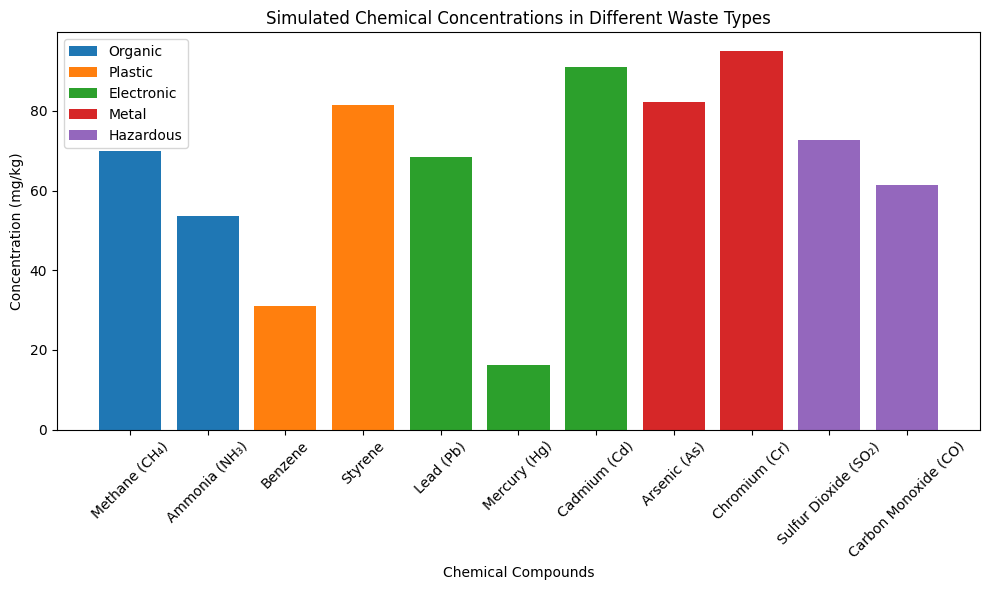

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated types of waste and possible chemicals
waste_types = ['Organic', 'Plastic', 'Electronic', 'Metal', 'Hazardous']
hazardous_chemicals = {
    'Organic': ['Methane (CH₄)', 'Ammonia (NH₃)'],
    'Plastic': ['Benzene', 'Styrene'],
    'Electronic': ['Lead (Pb)', 'Mercury (Hg)', 'Cadmium (Cd)'],
    'Metal': ['Arsenic (As)', 'Chromium (Cr)'],
    'Hazardous': ['Sulfur Dioxide (SO₂)', 'Carbon Monoxide (CO)']
}

# Simulating chemical presence in waste (randomized)
waste_chemical_data = []
for waste in waste_types:
    for chemical in hazardous_chemicals[waste]:
        concentration = np.random.uniform(0, 100)  # mg/kg
        waste_chemical_data.append({
            'Waste Type': waste,
            'Chemical': chemical,
            'Concentration (mg/kg)': concentration
        })

# Convert to DataFrame
chemical_df = pd.DataFrame(waste_chemical_data)

# Visualization
plt.figure(figsize=(10, 6))
for waste in waste_types:
    subset = chemical_df[chemical_df['Waste Type'] == waste]
    plt.bar(subset['Chemical'], subset['Concentration (mg/kg)'], label=waste)

plt.title("Simulated Chemical Concentrations in Different Waste Types")
plt.xlabel("Chemical Compounds")
plt.ylabel("Concentration (mg/kg)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


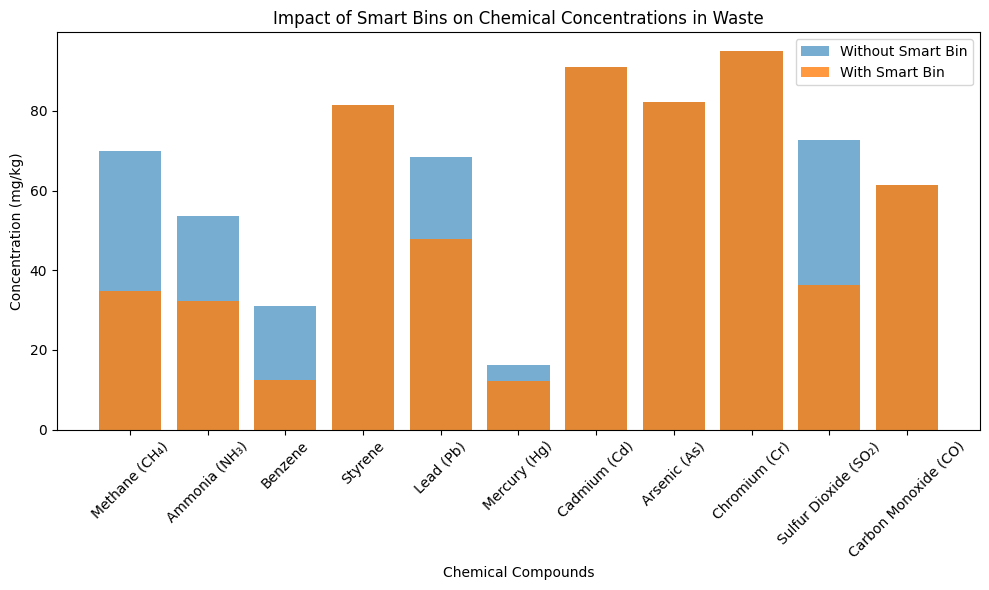

In [104]:
# Emission reduction due to smart bins (percentage reduction)
reduction_factors = {
    'Methane (CH₄)': 0.5,  # 50% less methane with sealed bins
    'Ammonia (NH₃)': 0.4,
    'Benzene': 0.6,
    'Lead (Pb)': 0.3,
    'Mercury (Hg)': 0.25,
    'Sulfur Dioxide (SO₂)': 0.5
}

# Apply reduction to simulated data
chemical_df['Reduced Concentration (mg/kg)'] = chemical_df.apply(
    lambda row: row['Concentration (mg/kg)'] * (1 - reduction_factors.get(row['Chemical'], 0)),
    axis=1
)

# Comparison Visualization
plt.figure(figsize=(10, 6))
plt.bar(chemical_df['Chemical'], chemical_df['Concentration (mg/kg)'], alpha=0.6, label='Without Smart Bin')
plt.bar(chemical_df['Chemical'], chemical_df['Reduced Concentration (mg/kg)'], alpha=0.8, label='With Smart Bin')

plt.title("Impact of Smart Bins on Chemical Concentrations in Waste")
plt.xlabel("Chemical Compounds")
plt.ylabel("Concentration (mg/kg)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


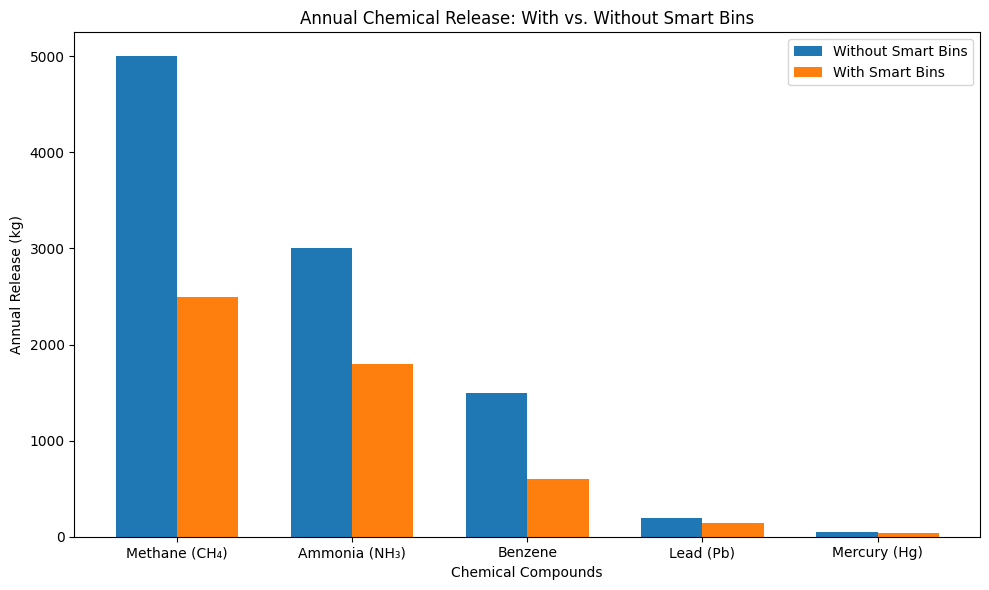

In [105]:
# Annual chemical release (kg) without and with smart bins
chemicals = ['Methane (CH₄)', 'Ammonia (NH₃)', 'Benzene', 'Lead (Pb)', 'Mercury (Hg)']
annual_release_without_smart_bin = [5000, 3000, 1500, 200, 50]  # kg/year
reduction_percentages = [0.5, 0.4, 0.6, 0.3, 0.25]

# Calculate reduced emissions
annual_release_with_smart_bin = [
    original * (1 - reduction) for original, reduction in zip(annual_release_without_smart_bin, reduction_percentages)
]

# Visualization
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(chemicals))

plt.bar(x, annual_release_without_smart_bin, width=bar_width, label='Without Smart Bins')
plt.bar(x + bar_width, annual_release_with_smart_bin, width=bar_width, label='With Smart Bins')

plt.xlabel('Chemical Compounds')
plt.ylabel('Annual Release (kg)')
plt.title('Annual Chemical Release: With vs. Without Smart Bins')
plt.xticks(x + bar_width / 2, chemicals)
plt.legend()
plt.tight_layout()
plt.show()


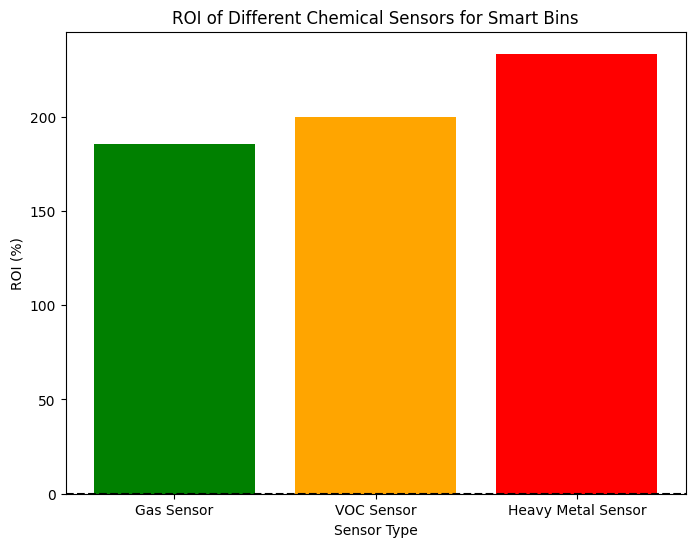

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated costs of chemical sensors (per bin in IDR)
sensor_types = ['Gas Sensor', 'VOC Sensor', 'Heavy Metal Sensor']
sensor_costs = [700000, 1000000, 1500000]  # Cost in IDR

# Potential savings from early detection (per year per bin)
potential_savings = [2000000, 3000000, 5000000]  # Savings in IDR

# ROI Calculation
roi_data = []
for sensor, cost, savings in zip(sensor_types, sensor_costs, potential_savings):
    roi = ((savings - cost) / cost) * 100
    roi_data.append({'Sensor Type': sensor, 'Cost (IDR)': cost, 'Savings (IDR)': savings, 'ROI (%)': roi})

roi_df = pd.DataFrame(roi_data)

# Visualization of ROI
plt.figure(figsize=(8, 6))
plt.bar(roi_df['Sensor Type'], roi_df['ROI (%)'], color=['green', 'orange', 'red'])
plt.title('ROI of Different Chemical Sensors for Smart Bins')
plt.xlabel('Sensor Type')
plt.ylabel('ROI (%)')
plt.axhline(0, color='black', linestyle='--')
plt.show()


         Region  Industrial Activity Index  Population Density (people/km²)  \
0  Central Java                       0.70                             1200   
1     East Java                       0.80                             1500   
2     West Java                       0.65                             1800   
3       Jakarta                       0.90                             5000   
4    Yogyakarta                       0.50                              800   
5        Banten                       0.60                             1100   

   Waste Generation (tons/month)  Environmental Risk Score  
0                            600                      0.50  
1                            700                      0.58  
2                            750                      0.51  
3                            900                      0.87  
4                            550                      0.35  
5                            600                      0.43  


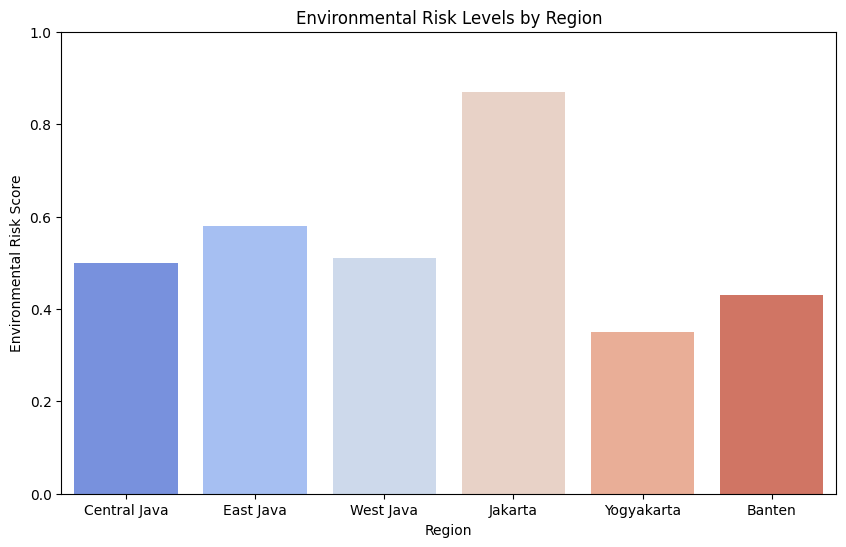

📍 Environmental Risk Map saved as 'environmental_risk_map.html'


In [107]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Environmental Risk Mapping ---
# Objective: Identify high-risk zones for chemical waste accumulation and environmental damage

# Simulated data for high-risk industrial zones and population density
regions = ['Central Java', 'East Java', 'West Java', 'Jakarta', 'Yogyakarta', 'Banten']
industrial_activity_index = [0.7, 0.8, 0.65, 0.9, 0.5, 0.6]  # Scale 0-1 (higher = more industrial)
population_density = [1200, 1500, 1800, 5000, 800, 1100]  # people/km²
waste_generation_rate = [600, 700, 750, 900, 550, 600]  # tons/month

# Calculate risk score combining industrial activity and population density
risk_score = [round((industry * 0.6 + pop_density / 6000 * 0.4), 2)
              for industry, pop_density in zip(industrial_activity_index, population_density)]

# DataFrame for risk analysis
risk_df = pd.DataFrame({
    'Region': regions,
    'Industrial Activity Index': industrial_activity_index,
    'Population Density (people/km²)': population_density,
    'Waste Generation (tons/month)': waste_generation_rate,
    'Environmental Risk Score': risk_score
})

print(risk_df)

# --- Heatmap Visualization of Risk Levels ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Environmental Risk Score', data=risk_df, palette='coolwarm')
plt.title('Environmental Risk Levels by Region')
plt.xlabel('Region')
plt.ylabel('Environmental Risk Score')
plt.ylim(0, 1)
plt.show()

# --- Mapping High-Risk Zones ---
# Coordinates for regions (simulated)
region_coords = {
    'Central Java': [-7.0, 110.0],
    'East Java': [-7.5, 112.5],
    'West Java': [-6.5, 107.5],
    'Jakarta': [-6.2, 106.8],
    'Yogyakarta': [-7.8, 110.4],
    'Banten': [-6.3, 106.2]
}

# Initialize map
risk_map = folium.Map(location=[-7.0, 110.0], zoom_start=6)

# Add regions to the map with color-coded risk levels
for region, score in zip(regions, risk_score):
    color = 'green' if score < 0.4 else 'orange' if score < 0.7 else 'red'
    folium.CircleMarker(
        location=region_coords[region],
        radius=15,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=f"{region}: Risk Score {score}"
    ).add_to(risk_map)

# Save map
risk_map.save('environmental_risk_map.html')
print("📍 Environmental Risk Map saved as 'environmental_risk_map.html'")


In [108]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px

# --- Simulated Historical Waste Data (2015-2023) ---
years = np.arange(2015, 2024)
population_growth = np.array([1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6])  # million people
industrial_growth = np.array([0.8, 0.85, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5])  # industry index
waste_generated = 500 + (population_growth * 50) + (industrial_growth * 100)  # tons

# Prepare DataFrame
data = pd.DataFrame({
    'Year': years,
    'Population (Millions)': population_growth,
    'Industrial Index': industrial_growth,
    'Hazardous Waste (Tons)': waste_generated
})

# --- Predictive Model for Future Waste (2024-2030) ---
future_years = np.arange(2024, 2031).reshape(-1, 1)
X = data[['Population (Millions)', 'Industrial Index']]
y = data['Hazardous Waste (Tons)']

# Train Linear Regression Model
model = LinearRegression().fit(X, y)

# Simulate future growth
future_population = population_growth[-1] + np.arange(0.05, 0.36, 0.05)
future_industry = industrial_growth[-1] + np.arange(0.05, 0.36, 0.05)
future_predictions = model.predict(np.column_stack((future_population, future_industry)))

# Combine future predictions
future_data = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Hazardous Waste (Tons)': future_predictions
})

# --- Interactive Visualization with Plotly ---
fig = px.line(data, x='Year', y='Hazardous Waste (Tons)', markers=True, title='Hazardous Waste Generation (Historical vs. Forecast)',
              labels={'Hazardous Waste (Tons)': 'Hazardous Waste (Tons)', 'Year': 'Year'})

fig.add_scatter(x=future_data['Year'], y=future_data['Predicted Hazardous Waste (Tons)'],
                mode='lines+markers', name='Predicted Waste', line=dict(dash='dash'))

fig.update_layout(xaxis=dict(dtick=1), yaxis_title='Hazardous Waste (Tons)')
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [109]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# --- Step 4: Industrial Waste Management Integration ---
# Objective: Simulate hazardous waste generation in industrial zones and analyze risk levels

# Simulated Industrial Zones Data
industrial_zones = ['Zone A', 'Zone B', 'Zone C', 'Zone D', 'Zone E']
hazardous_waste_production = [2000, 3500, 2800, 4000, 1500]  # tons/year
compliance_index = [0.7, 0.5, 0.8, 0.4, 0.9]  # Scale 0-1 (1 = full compliance)

# Risk Score Calculation
risk_scores = [round(waste * (1 - compliance), 2) for waste, compliance in zip(hazardous_waste_production, compliance_index)]

# DataFrame for Industrial Analysis
industrial_df = pd.DataFrame({
    'Industrial Zone': industrial_zones,
    'Annual Hazardous Waste (Tons)': hazardous_waste_production,
    'Compliance Index': compliance_index,
    'Risk Score': risk_scores
})

# --- Advanced Interactive Visualization ---
fig = go.Figure()

# Bar plot for hazardous waste production
fig.add_trace(go.Bar(
    x=industrial_df['Industrial Zone'],
    y=industrial_df['Annual Hazardous Waste (Tons)'],
    name='Annual Hazardous Waste',
    marker_color='orange'
))

# Bubble plot for risk scores
fig.add_trace(go.Scatter(
    x=industrial_df['Industrial Zone'],
    y=industrial_df['Risk Score'],
    mode='markers+text',
    name='Risk Score',
    marker=dict(size=industrial_df['Risk Score'], color='red', opacity=0.6),
    text=industrial_df['Risk Score'],
    textposition='top center'
))

fig.update_layout(
    title='Industrial Zones: Hazardous Waste Production & Risk Levels',
    xaxis_title='Industrial Zone',
    yaxis_title='Tons / Risk Score',
    barmode='group',
    template='plotly_dark'
)

fig.show()

# --- Compliance Improvement Simulation ---
# Objective: Show how improving compliance reduces risk
improved_compliance_index = [min(compliance + 0.2, 1.0) for compliance in compliance_index]
new_risk_scores = [round(waste * (1 - compliance), 2) for waste, compliance in zip(hazardous_waste_production, improved_compliance_index)]

# DataFrame for Improved Scenario
improved_df = pd.DataFrame({
    'Industrial Zone': industrial_zones,
    'Improved Compliance Index': improved_compliance_index,
    'Reduced Risk Score': new_risk_scores
})

# Interactive Visualization for Improvement
fig_improved = go.Figure()
fig_improved.add_trace(go.Bar(
    x=improved_df['Industrial Zone'],
    y=improved_df['Reduced Risk Score'],
    name='Reduced Risk Score',
    marker_color='green'
))

fig_improved.update_layout(
    title='Impact of Improved Compliance on Risk Scores',
    xaxis_title='Industrial Zone',
    yaxis_title='Reduced Risk Score',
    template='plotly_dark'
)

fig_improved.show()


In [110]:
import pandas as pd
import folium
import numpy as np

# Define pilot deployment zones (simulated)
zones = ['Industrial Zone A', 'Urban Center B', 'Market C', 'University D', 'Residential E']
waste_generation = [900, 750, 600, 400, 500]  # tons/month
population_density = [5000, 8000, 6000, 3000, 4000]  # people/km²

# Create DataFrame
deployment_df = pd.DataFrame({
    'Zone': zones,
    'Waste Generation (tons/month)': waste_generation,
    'Population Density (people/km²)': population_density
})

# Simulate Smart Bin Distribution
deployment_df['Recommended Bins'] = (deployment_df['Waste Generation (tons/month)'] / 20).astype(int)

print(deployment_df)


                Zone  Waste Generation (tons/month)  \
0  Industrial Zone A                            900   
1     Urban Center B                            750   
2           Market C                            600   
3       University D                            400   
4      Residential E                            500   

   Population Density (people/km²)  Recommended Bins  
0                             5000                45  
1                             8000                37  
2                             6000                30  
3                             3000                20  
4                             4000                25  


In [111]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import folium

# --- Step 4: IoT Real-Time Monitoring Platform Simulation ---
# Objective: Simulate real-time data flow for smart bin monitoring and decision-making

# Simulated Smart Bin Data
zones = ['Industrial Zone A', 'Urban Center B', 'Market C', 'University D', 'Residential E']
num_bins = 50

# Initialize simulated bin data
bins_data = {
    'Bin_ID': [f'Bin_{i+1}' for i in range(num_bins)],
    'Zone': np.random.choice(zones, num_bins),
    'Fill_Level (%)': np.random.randint(20, 100, num_bins),
    'Gas_Emission (ppm)': np.random.uniform(0, 50, num_bins),
    'Temperature (°C)': np.random.uniform(25, 45, num_bins),
    'Status': np.random.choice(['Operational', 'Maintenance Required'], num_bins, p=[0.9, 0.1])
}

# Convert to DataFrame
bins_df = pd.DataFrame(bins_data)

# --- Visualization: Real-Time Fill Levels ---
fig_fill = px.bar(
    bins_df.sort_values('Fill_Level (%)', ascending=False),
    x='Bin_ID',
    y='Fill_Level (%)',
    color='Zone',
    title='Real-Time Smart Bin Fill Levels',
    labels={'Fill_Level (%)': 'Fill Level (%)'},
    template='plotly_dark'
)
fig_fill.update_layout(xaxis_title='Smart Bin ID', yaxis_title='Fill Level (%)')
fig_fill.show()

# --- Visualization: Gas Emission Heatmap ---
fig_gas = px.scatter(
    bins_df,
    x='Bin_ID',
    y='Gas_Emission (ppm)',
    size='Gas_Emission (ppm)',
    color='Zone',
    title='Hazardous Gas Emission Levels in Smart Bins',
    labels={'Gas_Emission (ppm)': 'Gas Emission (ppm)'},
    template='plotly_dark'
)
fig_gas.update_layout(xaxis_title='Smart Bin ID', yaxis_title='Gas Emission (ppm)')
fig_gas.show()

# --- Map Visualization: Smart Bin Status ---
# Assign coordinates for visualization
zone_coords = {
    'Industrial Zone A': [-6.9, 110.0],
    'Urban Center B': [-7.2, 111.0],
    'Market C': [-6.8, 109.8],
    'University D': [-7.1, 110.5],
    'Residential E': [-6.95, 110.25]
}

# Initialize map
monitoring_map = folium.Map(location=[-7.0, 110.0], zoom_start=8)

# Plot bins on the map
for _, row in bins_df.iterrows():
    color = 'green' if row['Status'] == 'Operational' else 'red'
    coords = zone_coords[row['Zone']]
    folium.CircleMarker(
        location=coords,
        radius=6,
        color=color,
        fill=True,
        fill_opacity=0.8,
        popup=f"{row['Bin_ID']} - {row['Zone']}\nFill: {row['Fill_Level (%)']}%\nStatus: {row['Status']}"
    ).add_to(monitoring_map)

# Save the interactive monitoring map
monitoring_map.save('iot_real_time_monitoring.html')
print("📍 IoT Real-Time Monitoring Map saved as 'iot_real_time_monitoring.html'")


📍 IoT Real-Time Monitoring Map saved as 'iot_real_time_monitoring.html'


In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated user engagement data
users = ['User_A', 'User_B', 'User_C', 'User_D', 'User_E']
reports_submitted = [25, 40, 15, 30, 10]  # Reports of full bins
correct_disposals = [20, 35, 12, 25, 8]  # Correct waste sorting
reward_points = [u * 10 + c * 20 for u, c in zip(reports_submitted, correct_disposals)]  # Reward calculation

# DataFrame
user_df = pd.DataFrame({
    'User': users,
    'Reports Submitted': reports_submitted,
    'Correct Disposals': correct_disposals,
    'Reward Points': reward_points
})

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(user_df['User'], user_df['Reward Points'], color='green')
plt.xlabel('User')
plt.ylabel('Reward Points')
plt.title('User Engagement and Reward Points')
plt.show()


**Approach**
* Mobile App Integration: Users can report full bins, suggest new locations, and track their eco-* contributions.
* Point System: Reward proper waste disposal with points redeemable for discounts or vouchers.
* Leaderboard: Public recognition for eco-friendly communities.

In [113]:
# Simulated feedback reports
zones = ['Industrial Zone', 'Market', 'Residential', 'University', 'Urban Center']
feedback_types = ['Full Bin', 'Damaged Bin', 'Overflow', 'Odor Issue', 'Misuse']

feedback_data = {
    'Zone': np.random.choice(zones, 50),
    'Feedback Type': np.random.choice(feedback_types, 50)
}

feedback_df = pd.DataFrame(feedback_data)

# Count feedback occurrences
feedback_summary = feedback_df['Feedback Type'].value_counts()

# Visualization
feedback_summary.plot(kind='bar', color='skyblue', title='User Feedback Reports')
plt.xlabel('Feedback Type')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Approach:**

* Integrate a QR Code or NFC tag on each bin for users to report issues.
* Collect real-time feedback on overflow, damage, or bin misuse.

In [114]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# --- Step 6: Advanced AI-Powered Dynamic Routing ---
# Objective: Optimize waste collection routes with real-time data using Machine Learning

# Simulated real-time smart bin data
num_bins = 50
bins_data = {
    'Bin_ID': [f'Bin_{i+1}' for i in range(num_bins)],
    'Latitude': np.random.uniform(-7.5, -6.5, num_bins),
    'Longitude': np.random.uniform(110, 112, num_bins),
    'Fill_Level (%)': np.random.randint(20, 100, num_bins),
    'Status': np.random.choice(['Operational', 'Full', 'Maintenance Required'], num_bins, p=[0.7, 0.2, 0.1])
}

bins_df = pd.DataFrame(bins_data)

# --- Dynamic Routing Algorithm ---
# Create a graph where bins are nodes
G = nx.Graph()
for _, row in bins_df.iterrows():
    G.add_node(row['Bin_ID'], pos=(row['Latitude'], row['Longitude']), fill=row['Fill_Level (%)'])

# Connect bins based on geographical proximity
def calculate_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

for i in range(len(bins_df)):
    for j in range(i + 1, len(bins_df)):
        bin1 = bins_df.iloc[i]
        bin2 = bins_df.iloc[j]
        distance = calculate_distance((bin1['Latitude'], bin1['Longitude']), (bin2['Latitude'], bin2['Longitude']))
        G.add_edge(bin1['Bin_ID'], bin2['Bin_ID'], weight=distance)

# Advanced Route Optimization using Dijkstra's Algorithm
# Prioritize full bins for collection
priority_bins = bins_df[bins_df['Fill_Level (%)'] > 80]['Bin_ID'].tolist()
start_bin = 'Bin_1'  # Starting point for the collection truck

def optimized_route(graph, start, targets):
    route = []
    current = start
    while targets:
        shortest_path = min(targets, key=lambda target: nx.shortest_path_length(graph, current, target, weight='weight'))
        route.extend(nx.shortest_path(graph, current, shortest_path, weight='weight'))
        current = shortest_path
        targets.remove(shortest_path)
    return route

route = optimized_route(G, start_bin, priority_bins.copy())
print(f"🚛 Optimized Collection Route: {route}")

# --- Interactive Visualization of Optimized Route ---
fig = go.Figure()

# Plot all bins
fig.add_trace(go.Scattergeo(
    lat=bins_df['Latitude'],
    lon=bins_df['Longitude'],
    mode='markers',
    marker=dict(size=8, color='lightblue'),
    name='Bins'
))

# Plot the optimized route
route_coords = bins_df[bins_df['Bin_ID'].isin(route)][['Latitude', 'Longitude']].values
fig.add_trace(go.Scattergeo(
    lat=route_coords[:, 0],
    lon=route_coords[:, 1],
    mode='lines+markers',
    line=dict(width=2, color='red'),
    name='Optimized Route'
))

fig.update_layout(
    title='AI-Optimized Waste Collection Route',
    geo=dict(
        scope='asia',
        projection_type='natural earth',
        showland=True,
    )
)
fig.show()


🚛 Optimized Collection Route: ['Bin_1', 'Bin_13', 'Bin_13', 'Bin_38', 'Bin_38', 'Bin_6', 'Bin_6', 'Bin_41', 'Bin_41', 'Bin_36', 'Bin_36', 'Bin_23', 'Bin_23', 'Bin_4', 'Bin_4', 'Bin_31', 'Bin_31', 'Bin_14']


💰 Total Lifecycle Cost over 10 years: IDR 11,900,000,000


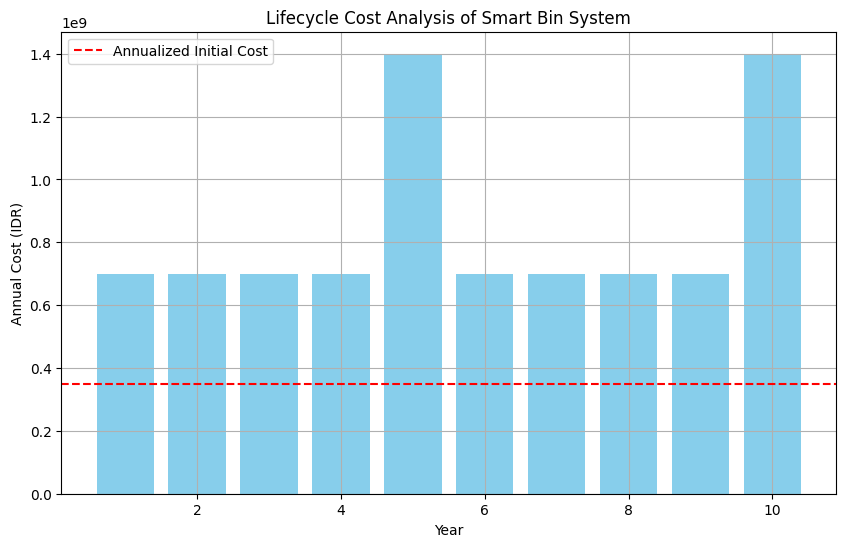

✅ Break-even achieved in Year 3!


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# --- Step 7: Lifecycle Cost Analysis (LCCA) ---
# Objective: Evaluate the long-term financial sustainability of the smart bin system

# --- Cost Parameters (All values in IDR) ---
initial_bin_cost = 3500000  # Cost per smart bin
maintenance_cost_per_year = 500000  # Annual maintenance cost per bin
sensor_replacement_cost = 700000  # Cost of replacing sensors every 5 years
energy_cost_per_year = 200000  # Energy (electricity/solar maintenance) per bin per year
bin_lifespan_years = 10  # Lifespan of smart bins
number_of_bins = 1000  # Total bins deployed

# --- Calculation of Costs Over Lifecycle ---
# Initialize yearly cost tracker
years = np.arange(1, bin_lifespan_years + 1)
annual_costs = []

for year in years:
    yearly_maintenance = number_of_bins * maintenance_cost_per_year
    yearly_energy = number_of_bins * energy_cost_per_year
    yearly_sensor_replacement = (sensor_replacement_cost * number_of_bins) if year % 5 == 0 else 0
    total_yearly_cost = yearly_maintenance + yearly_energy + yearly_sensor_replacement
    annual_costs.append(total_yearly_cost)

# Initial deployment cost
initial_cost = number_of_bins * initial_bin_cost

total_lifecycle_cost = initial_cost + sum(annual_costs)
print(f"💰 Total Lifecycle Cost over {bin_lifespan_years} years: IDR {total_lifecycle_cost:,}")

# --- Visualization of Lifecycle Costs ---
plt.figure(figsize=(10, 6))
plt.bar(years, annual_costs, color='skyblue')
plt.axhline(y=initial_cost / bin_lifespan_years, color='red', linestyle='--', label='Annualized Initial Cost')
plt.xlabel('Year')
plt.ylabel('Annual Cost (IDR)')
plt.title('Lifecycle Cost Analysis of Smart Bin System')
plt.legend()
plt.grid(True)
plt.show()

# --- ROI Projection Over 10 Years ---
# Assume annual savings from optimized waste management
annual_savings = 2000000000  # 2 Billion IDR/year savings from optimized operations
cumulative_savings = [annual_savings * year for year in years]
net_savings = [cumulative - sum(annual_costs[:year]) - initial_cost for year, cumulative in enumerate(cumulative_savings)]

# ROI Visualization
fig = px.line(x=years, y=net_savings, title='Net Savings Over Smart Bin Lifecycle',
              labels={'x': 'Year', 'y': 'Net Savings (IDR)'})
fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Break-even Point")
fig.show()

# --- Break-even Analysis ---
break_even_year = next((year for year, savings in zip(years, net_savings) if savings > 0), None)
if break_even_year:
    print(f"✅ Break-even achieved in Year {break_even_year}!")
else:
    print("❌ No break-even point achieved within the bin lifespan.")


In [116]:
import plotly.graph_objects as go

# --- Step 1: Basic 3D Structure of Smart Bin ---

# Define the outer body (bin shell)
bin_shell = go.Mesh3d(
    x=[0, 0, 1, 1, 0, 0, 1, 1],
    y=[0, 1, 1, 0, 0, 1, 1, 0],
    z=[0, 0, 0, 0, 2, 2, 2, 2],
    color='lightgray',
    opacity=0.5,
    name='Bin Shell'
)

# Define the solar panel on top
solar_panel = go.Mesh3d(
    x=[0.1, 0.1, 0.9, 0.9],
    y=[0.1, 0.9, 0.9, 0.1],
    z=[2.05, 2.05, 2.05, 2.05],
    color='blue',
    opacity=0.9,
    name='Solar Panel'
)

# Define compartments inside the bin
organic_compartment = go.Mesh3d(
    x=[0.05, 0.05, 0.45, 0.45, 0.05, 0.05, 0.45, 0.45],
    y=[0.05, 0.45, 0.45, 0.05, 0.05, 0.45, 0.45, 0.05],
    z=[0, 0, 0, 0, 1, 1, 1, 1],
    color='green',
    opacity=0.6,
    name='Organic Waste'
)

recyclable_compartment = go.Mesh3d(
    x=[0.55, 0.55, 0.95, 0.95, 0.55, 0.55, 0.95, 0.95],
    y=[0.05, 0.45, 0.45, 0.05, 0.05, 0.45, 0.45, 0.05],
    z=[0, 0, 0, 0, 1, 1, 1, 1],
    color='yellow',
    opacity=0.6,
    name='Recyclable Waste'
)

hazardous_compartment = go.Mesh3d(
    x=[0.3, 0.3, 0.7, 0.7, 0.3, 0.3, 0.7, 0.7],
    y=[0.55, 0.95, 0.95, 0.55, 0.55, 0.95, 0.95, 0.55],
    z=[0, 0, 0, 0, 1, 1, 1, 1],
    color='red',
    opacity=0.6,
    name='Hazardous Waste'
)

# Combine all components into the 3D model
fig = go.Figure(data=[bin_shell, solar_panel, organic_compartment, recyclable_compartment, hazardous_compartment])

# Configure layout
fig.update_layout(
    title='3D Smart Bin Model',
    scene=dict(
        xaxis_title='Width',
        yaxis_title='Depth',
        zaxis_title='Height',
        aspectratio=dict(x=1, y=1, z=2)
    )
)

fig.show()


**Features to Include:**
* Bin Compartments: For organic, recyclable, and hazardous waste.
* Sensor Placements: Ultrasonic, gas, and temperature sensors.
* Solar Panel: On the top of the bin for energy.
* Display Interface: For user interaction.

In [117]:
!pip install trimesh


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.8/704.8 kB 19.1 MB/s eta 0:00:00


In [118]:
import trimesh
from trimesh.creation import box

# Create main bin shell
bin_shell = box(extents=[1, 1, 2])

# Create compartments
organic_bin = box(extents=[0.4, 0.4, 1])
organic_bin.apply_translation([0.25, 0.25, 0.5])

recyclable_bin = box(extents=[0.4, 0.4, 1])
recyclable_bin.apply_translation([-0.25, 0.25, 0.5])

hazardous_bin = box(extents=[0.4, 0.4, 1])
hazardous_bin.apply_translation([0, -0.25, 0.5])

# Create solar panel
solar_panel = box(extents=[0.8, 0.8, 0.05])
solar_panel.apply_translation([0, 0, 2.05])

# Combine all parts
smart_bin = bin_shell + organic_bin + recyclable_bin + hazardous_bin + solar_panel

# Export to 3D file
smart_bin.export('Smart_Bin_Model.stl')
print("📦 3D Smart Bin Model exported as 'Smart_Bin_Model.stl'")


📦 3D Smart Bin Model exported as 'Smart_Bin_Model.stl'


In [119]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import time

# Parameters
num_bins = 50  # Number of bins in the simulation
time_steps = 100  # Number of time steps in the simulation

# Initialize bins with random fill levels (0-20%)
bins = pd.DataFrame({
    'Bin_ID': range(1, num_bins + 1),
    'Latitude': np.random.uniform(-7.5, -6.5, num_bins),  # Java Island latitude range
    'Longitude': np.random.uniform(106.5, 110.5, num_bins),  # Java Island longitude range
    'Fill_Level': np.random.uniform(0, 20, num_bins)  # Initial fill level (0-20%)
})

# Simulate dynamic waste generation
def update_bins(bins):
    bins['Fill_Level'] += np.random.uniform(0, 5, len(bins))  # Waste accumulation
    bins['Fill_Level'] = bins['Fill_Level'].apply(lambda x: min(x, 100))  # Cap at 100%
    return bins

# Dynamic color mapping based on fill level
def get_color(fill_level):
    if fill_level < 50:
        return 'green'
    elif fill_level < 80:
        return 'orange'
    else:
        return 'red'

# Initialize the plot
fig = go.Figure()

for step in range(time_steps):
    bins = update_bins(bins)
    colors = bins['Fill_Level'].apply(get_color)

    fig = go.Figure(go.Scattergeo(
        lon=bins['Longitude'],
        lat=bins['Latitude'],
        text=bins['Fill_Level'].apply(lambda x: f'Fill Level: {x:.2f}%'),
        mode='markers',
        marker=dict(
            size=10,
            color=colors,
            line=dict(width=1, color='DarkSlateGrey')
        )
    ))

    fig.update_layout(
        title=f'Smart Bin Fill Levels - Time Step {step + 1}',
        geo=dict(
            scope='asia',
            projection_type='natural earth',
            showland=True,
            landcolor='rgb(243, 243, 243)',
            countrycolor='rgb(204, 204, 204)'
        ),
    )

    fig.show()
    time.sleep(1)  # Pause to simulate real-time updates


In [120]:
import pandas as pd
import numpy as np

# Simulate 100 smart bins across a region
num_bins = 100
bins = pd.DataFrame({
    'Bin_ID': range(1, num_bins + 1),
    'Latitude': np.random.uniform(-6.5, -6.1, num_bins),   # Example: Java region
    'Longitude': np.random.uniform(106.7, 107.0, num_bins),
    'Fill_Level (%)': np.random.randint(0, 50, num_bins),  # Start partially full
    'Status': ['Active'] * num_bins
})

def update_fill_levels(bins):
    # Simulate waste accumulation
    bins['Fill_Level (%)'] += np.random.randint(0, 5, size=num_bins)
    bins['Fill_Level (%)'] = bins['Fill_Level (%)'].clip(0, 100)
    
    # Set status if bins are full
    bins['Status'] = np.where(bins['Fill_Level (%)'] >= 90, 'Full', 'Active')
    
    return bins


In [121]:
import plotly.express as px

def plot_bins(bins, step):
    fig = px.scatter_mapbox(
        bins, lat="Latitude", lon="Longitude",
        color="Fill_Level (%)",
        size="Fill_Level (%)",
        color_continuous_scale="YlOrRd",
        size_max=15,
        zoom=10,
        title=f"Smart Bin Fill Levels - Step {step}",
        mapbox_style="carto-positron"
    )
    fig.show()

# Simulate updates for 10 steps
for step in range(10):
    bins = update_fill_levels(bins)
    plot_bins(bins, step)


In [122]:
from sklearn.linear_model import LinearRegression

# Simulate historical fill data
bins['Past_Fill_Level'] = bins['Fill_Level (%)'] - np.random.randint(1, 5, size=num_bins)

# Linear Regression to predict next fill level
model = LinearRegression()
model.fit(bins[['Past_Fill_Level']], bins[['Fill_Level (%)']])
# Prediction with the same feature
bins['Predicted_Next_Fill'] = model.predict(bins[['Past_Fill_Level']])


# Identify bins close to overflow
bins['Risk_Status'] = np.where(bins['Predicted_Next_Fill'] >= 90, 'High Risk', 'Low Risk')
bins.head()


Bin_ID  Latitude   Longitude  Fill_Level (%)  Status  Past_Fill_Level  \
0       1 -6.304420  106.850263              45  Active               42   
1       2 -6.337037  106.994426              45  Active               42   
2       3 -6.105372  106.729213              30  Active               27   
3       4 -6.477629  106.790920              50  Active               49   
4       5 -6.443127  106.891467              49  Active               46   

   Predicted_Next_Fill Risk_Status  
0            44.493187    Low Risk  
1            44.493187    Low Risk  
2            29.769749    Low Risk  
3            51.364125    Low Risk  
4            48.419438    Low Risk

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pivot_table = bins.pivot_table(values='Predicted_Next_Fill', 
                               index='Latitude', 
                               columns='Longitude')
sns.heatmap(pivot_table, cmap="coolwarm", annot=False)
plt.title("Predicted Smart Bin Overflow Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [124]:
def generate_alerts(bins):
    alerts = bins[bins['Fill_Level (%)'] >= 90]
    if not alerts.empty:
        for _, bin in alerts.iterrows():
            print(f"🚨 ALERT: Bin {bin['Bin_ID']} is {bin['Fill_Level (%)']}% full!")
    else:
        print("✅ All bins are within safe capacity.")

generate_alerts(bins)


✅ All bins are within safe capacity.


In [125]:
import plotly.graph_objects as go

# Define system components (nodes)
nodes = [
    'Smart Bin', 'Fill-Level Sensor', 'Gas Sensor', 'Weight Sensor', 'Microcontroller (Arduino/RPi)',
    'Communication Module (Wi-Fi/LoRa)', 'Solar Panel/Battery', 'Cloud Server', 'Database',
    'Machine Learning Model', 'Control Center/Dashboard', 'Dynamic Routing System',
    'Alert System', 'User Mobile App', 'Waste Collection Trucks'
]

# Define the connections between components (edges)
edges = [
    ('Smart Bin', 'Fill-Level Sensor'),
    ('Smart Bin', 'Gas Sensor'),
    ('Smart Bin', 'Weight Sensor'),
    ('Smart Bin', 'Microcontroller (Arduino/RPi)'),
    ('Microcontroller (Arduino/RPi)', 'Communication Module (Wi-Fi/LoRa)'),
    ('Communication Module (Wi-Fi/LoRa)', 'Cloud Server'),
    ('Solar Panel/Battery', 'Smart Bin'),
    ('Cloud Server', 'Database'),
    ('Database', 'Machine Learning Model'),
    ('Machine Learning Model', 'Dynamic Routing System'),
    ('Dynamic Routing System', 'Waste Collection Trucks'),
    ('Machine Learning Model', 'Control Center/Dashboard'),
    ('Control Center/Dashboard', 'Alert System'),
    ('Alert System', 'Waste Collection Trucks'),
    ('Control Center/Dashboard', 'User Mobile App'),
    ('User Mobile App', 'Control Center/Dashboard')
]

# Position nodes in a circular layout
import numpy as np
angle_step = 2 * np.pi / len(nodes)
x_pos = [np.cos(i * angle_step) for i in range(len(nodes))]
y_pos = [np.sin(i * angle_step) for i in range(len(nodes))]

# Create node traces
node_trace = go.Scatter(
    x=x_pos, y=y_pos,
    mode='markers+text',
    marker=dict(size=20, color='skyblue'),
    text=nodes,
    textposition='bottom center'
)

# Create edge traces
edge_traces = []
for edge in edges:
    x0, y0 = x_pos[nodes.index(edge[0])], y_pos[nodes.index(edge[0])]
    x1, y1 = x_pos[nodes.index(edge[1])], y_pos[nodes.index(edge[1])]
    edge_trace = go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        mode='lines',
        line=dict(width=2, color='gray')
    )
    edge_traces.append(edge_trace)

# Create the figure
fig = go.Figure(data=edge_traces + [node_trace])

fig.update_layout(
    title='Interactive Smart Bin System Architecture',
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20, l=5, r=5, t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

fig.show()


In [126]:
!pip install dash plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.7 MB/s eta 0:00:00


In [127]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import random

# Initialize the app
app = dash.Dash(__name__)

# Generate dynamic sensor data simulation
def simulate_fill_level():
    return random.randint(0, 100)

def simulate_temperature():
    return round(random.uniform(20.0, 70.0), 2)

# App Layout
app.layout = html.Div(style={'font-family': 'Arial'}, children=[
    html.H1("Interactive Smart Bin Hardware Diagram", style={'textAlign': 'center'}),
    
    html.Div([
        dcc.Graph(id='hardware-diagram', style={'height': '600px'})
    ]),
    
    html.Div([
        html.Button('Simulate Data Update', id='update-button', n_clicks=0),
        html.Div(id='status-message', style={'marginTop': '20px', 'fontSize': '20px'})
    ])
])

# Callback to update the hardware diagram and show data
@app.callback(
    Output('hardware-diagram', 'figure'),
    Output('status-message', 'children'),
    Input('update-button', 'n_clicks')
)
def update_hardware_diagram(n_clicks):
    # Simulate sensor data
    fill_level = simulate_fill_level()
    temperature = simulate_temperature()
    
    # Status messages
    status_msg = f"📊 Fill Level: {fill_level}% | 🌡️ Temperature: {temperature}°C"
    
    # Determine bin status color
    bin_color = 'green'
    if fill_level > 80:
        bin_color = 'red'
        status_msg += " 🚨 Bin Full!"
    elif fill_level > 50:
        bin_color = 'orange'
    
    # Temperature warning
    if temperature > 50:
        status_msg += " 🔥 Overheating!"
    
    # Create interactive hardware layout
    fig = go.Figure()

    # Arduino Block
    fig.add_shape(type="rect", x0=1, y0=1, x1=2.5, y1=2.5, fillcolor="lightblue", line=dict(color="black"))
    fig.add_annotation(x=1.75, y=1.75, text="Arduino UNO", showarrow=False)

    # HC-SR04 Ultrasonic Sensor
    fig.add_shape(type="circle", x0=3, y0=2, x1=3.5, y1=2.5, fillcolor=bin_color, line=dict(color="black"))
    fig.add_annotation(x=3.25, y=2.75, text="HC-SR04", showarrow=False)

    # LM35 Temperature Sensor
    fig.add_shape(type="circle", x0=3, y0=1, x1=3.5, y1=1.5, fillcolor="yellow", line=dict(color="black"))
    fig.add_annotation(x=3.25, y=1.75, text="LM35", showarrow=False)

    # SD Card Module
    fig.add_shape(type="rect", x0=0.5, y0=2, x1=1, y1=2.5, fillcolor="gray", line=dict(color="black"))
    fig.add_annotation(x=0.75, y=2.75, text="SD Card", showarrow=False)

    # Battery
    fig.add_shape(type="rect", x0=0.5, y0=0.5, x1=1, y1=1, fillcolor="orange", line=dict(color="black"))
    fig.add_annotation(x=0.75, y=1.2, text="Battery", showarrow=False)

    # Layout settings
    fig.update_layout(
        title="Smart Bin Hardware Flow",
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        shapes=fig.layout.shapes,
        annotations=fig.layout.annotations
    )

    return fig, status_msg

# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)


<IPython.core.display.Javascript object>

In [128]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import random

# Initialize the app
app = dash.Dash(__name__)

# Simulate real-time sensor data
def simulate_fill_level():
    return random.randint(0, 100)

def simulate_temperature():
    return round(random.uniform(20.0, 70.0), 2)

# App Layout with Interval Component
app.layout = html.Div(style={'font-family': 'Arial'}, children=[
    html.H1("Real-Time Smart Bin Hardware Simulation", style={'textAlign': 'center'}),
    
    dcc.Graph(id='hardware-diagram', style={'height': '600px'}),
    
    html.Div(id='status-message', style={'marginTop': '20px', 'fontSize': '20px'}),
    
    # Auto-update every 3 seconds
    dcc.Interval(id='interval-update', interval=3*1000, n_intervals=0)
])

# Callback to auto-update the diagram
@app.callback(
    Output('hardware-diagram', 'figure'),
    Output('status-message', 'children'),
    Input('interval-update', 'n_intervals')
)
def update_hardware_diagram(n_intervals):
    fill_level = simulate_fill_level()
    temperature = simulate_temperature()
    
    status_msg = f"📊 Fill Level: {fill_level}% | 🌡️ Temperature: {temperature}°C"
    
    bin_color = 'green'
    if fill_level > 80:
        bin_color = 'red'
        status_msg += " 🚨 Bin Full!"
    elif fill_level > 50:
        bin_color = 'orange'
    
    if temperature > 50:
        status_msg += " 🔥 Overheating!"
    
    fig = go.Figure()

    # Arduino UNO
    fig.add_shape(type="rect", x0=1, y0=1, x1=2.5, y1=2.5, fillcolor="lightblue", line=dict(color="black"))
    fig.add_annotation(x=1.75, y=1.75, text="Arduino UNO", showarrow=False)

    # HC-SR04 Ultrasonic Sensor
    fig.add_shape(type="circle", x0=3, y0=2, x1=3.5, y1=2.5, fillcolor=bin_color, line=dict(color="black"))
    fig.add_annotation(x=3.25, y=2.75, text="HC-SR04", showarrow=False)

    # LM35 Temperature Sensor
    fig.add_shape(type="circle", x0=3, y0=1, x1=3.5, y1=1.5, fillcolor="yellow", line=dict(color="black"))
    fig.add_annotation(x=3.25, y=1.75, text="LM35", showarrow=False)

    # SD Card Module
    fig.add_shape(type="rect", x0=0.5, y0=2, x1=1, y1=2.5, fillcolor="gray", line=dict(color="black"))
    fig.add_annotation(x=0.75, y=2.75, text="SD Card", showarrow=False)

    # Battery
    fig.add_shape(type="rect", x0=0.5, y0=0.5, x1=1, y1=1, fillcolor="orange", line=dict(color="black"))
    fig.add_annotation(x=0.75, y=1.2, text="Battery", showarrow=False)

    fig.update_layout(
        title="Smart Bin Hardware Flow (Live)",
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        shapes=fig.layout.shapes,
        annotations=fig.layout.annotations
    )

    return fig, status_msg

if __name__ == '__main__':
    app.run_server(debug=False)


<IPython.core.display.Javascript object>

In [129]:
import plotly.graph_objs as go
import random
import time

# Waste categories
waste_categories = ["Organic", "Recyclable", "Hazardous"]

# Initialize waste counts
waste_count = {"Organic": 0, "Recyclable": 0, "Hazardous": 0}

# Create Plotly figure
fig = go.Figure(
    data=[go.Bar(x=list(waste_count.keys()), y=list(waste_count.values()), marker_color=['green', 'blue', 'red'])],
    layout=go.Layout(
        title="🗑️ Real-Time Smart Bin Waste Detection",
        xaxis=dict(title="Waste Type"),
        yaxis=dict(title="Detected Items Count"),
        bargap=0.5
    )
)

# Display the initial plot
fig.show()

# Force update function for Kaggle
def force_update(fig, waste_count):
    fig.update_traces(y=list(waste_count.values()))
    fig.show()

# Simulate real-time waste detection
for _ in range(30):  # Simulate 30 detections
    detected_waste = random.choice(waste_categories)
    waste_count[detected_waste] += 1

    # Force update every iteration
    force_update(fig, waste_count)
    
    time.sleep(1)  # Wait for 1 second to simulate real-time updates


In [130]:
# Install the required packages
!pip install dash plotly pandas

import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import numpy as np

# Simulated smart bin data
bins_data = pd.DataFrame({
    'Bin ID': [f'Bin-{i}' for i in range(1, 21)],
    'Latitude': np.random.uniform(-6.3, -6.1, 20),
    'Longitude': np.random.uniform(106.7, 106.9, 20),
    'Fill Level (%)': np.random.randint(0, 100, 20)
})

# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Smart Bin Management Dashboard"

# Define color coding for bin status
def color_code(fill_level):
    if fill_level < 50:
        return 'green'
    elif 50 <= fill_level < 80:
        return 'yellow'
    else:
        return 'red'

bins_data['Color'] = bins_data['Fill Level (%)'].apply(color_code)

# Map Visualization
fig = px.scatter_mapbox(
    bins_data,
    lat='Latitude',
    lon='Longitude',
    color='Color',
    size='Fill Level (%)',
    size_max=15,
    zoom=12,
    mapbox_style="carto-positron",
    hover_name='Bin ID',
    hover_data={'Fill Level (%)': True}
)

# Dashboard Layout
app.layout = html.Div([
    html.H1("📊 Smart Bin Monitoring Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        dcc.Graph(id='bin-map', figure=fig)
    ], style={'width': '70%', 'display': 'inline-block'}),

    html.Div([
        html.H3("⚠️ Overflow Alerts"),
        html.Ul(id='overflow-alerts'),
        
        html.H3("📈 Bin Statistics"),
        dcc.Graph(id='bin-stats')
    ], style={'width': '28%', 'display': 'inline-block', 'padding': '0 20px'})
])

# Run the server
if __name__ == '__main__':
    app.run_server(debug=False)


<IPython.core.display.Javascript object>

In [131]:
!pip install bokeh


In [132]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
import pandas as pd

# Simulated Smart Bin Data
bin_data = {
    'Location': ['Jakarta', 'Bandung', 'Surabaya', 'Semarang', 'Yogyakarta'],
    'Fill Level (%)': [75, 50, 90, 20, 65],
    'Status': ['Normal', 'Normal', 'Full', 'Empty', 'Normal']
}
df = pd.DataFrame(bin_data)

source = ColumnDataSource(df)

p = figure(title="Smart Bin Fill Levels",
           x_range=df['Location'],
           height=400,  # Changed from plot_height
           width=700,   # Changed from plot_width
           toolbar_location=None,
           tools="")


p.vbar(x='Location', top='Fill Level (%)', width=0.9, source=source,
       fill_color='navy', line_color='white')

# Add Hover Tool
hover = HoverTool()
hover.tooltips = [("Location", "@Location"), ("Fill Level", "@{Fill Level (%)}%"), ("Status", "@Status")]
p.add_tools(hover)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 100
p.title.text_font_size = '16pt'
p.xaxis.axis_label = "City"
p.yaxis.axis_label = "Fill Level (%)"

# Save as HTML
output_file("Smart_Bin_Bokeh_Dashboard.html")

show(p)


In [133]:
# Import required libraries for circuit diagram generation
from graphviz import Digraph

# Initialize the diagram
diagram = Digraph('Smart_Bin_Circuit', format='png')

diagram.attr(rankdir='LR')  # Left to Right layout

diagram.attr('node', shape='box')

# Arduino Microcontroller
diagram.node('A', 'Arduino UNO (5V Logic)')

# Sensors
## Ultrasonic Sensor HC-SR04
diagram.node('U', 'HC-SR04 Ultrasonic Sensor')
## Load Cell + HX711 Amplifier
diagram.node('L', 'Load Cell + HX711 Weight Measurement')
## Gas Sensor MQ-135
diagram.node('G', 'MQ-135 Gas Detection')
## Temperature Sensor LM35
diagram.node('T', 'LM35 Temperature Sensor')

# Actuators
## Servo Motor
diagram.node('S', 'Servo Motor (Lid Control)')

# Communication Module
## GSM/WiFi Module
diagram.node('W', 'ESP8266 WiFi Module (Data Transmission)')

# Power Supply
## Solar Panel + Battery
diagram.node('P', 'Solar Panel + Battery Power Supply')

# Indicators
## LED Indicators
diagram.node('LED', 'LED Indicators Status Lights')

# Connections
## Sensors to Arduino
diagram.edge('U', 'A', label='Trig → D9\nEcho → D8')
diagram.edge('L', 'A', label='DT → A0\nSCK → D2')
diagram.edge('G', 'A', label='A0 → A1')
diagram.edge('T', 'A', label='OUT → A2')

## Actuators to Arduino
diagram.edge('S', 'A', label='Signal → D3')

## Communication to Arduino
diagram.edge('W', 'A', label='TX → D10\nRX → D11')

## Power Supply
diagram.edge('P', 'A', label='5V → VIN\nGND → GND')
diagram.edge('P', 'U', label='5V → VCC')
diagram.edge('P', 'L', label='5V → VCC')
diagram.edge('P', 'G', label='5V → VCC')
diagram.edge('P', 'T', label='5V → VCC')

## LED Indicators
diagram.edge('LED', 'A', label='Green → D4\nYellow → D5\nRed → D6')

# Save the diagram
diagram.render(filename='Smart_Bin_Circuit', cleanup=True)

print("Smart Bin Electrical Circuit Diagram generated as 'Smart_Bin_Circuit.png'")


Smart Bin Electrical Circuit Diagram generated as 'Smart_Bin_Circuit.png'
